<a href="https://colab.research.google.com/github/Sumit-Nayek/ML_Projects/blob/main/T_test_for_2_Group_data_and_visualisation_for_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import platform
print(platform.python_version())


3.11.13


In [ ]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest, confint_proportions_2indep

# Group 1 data
group1 = np.array([0,0,1,0,1,1,1,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,1,1])
# Group 2 data
group2 = np.array([1,1,0,0,1,1,0,0,1,1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0])

# Calculate counts
count1 = np.sum(group1)
nobs1 = len(group1)
count2 = np.sum(group2)
nobs2 = len(group2)

# Two-proportion z-test
zstat, pval = proportions_ztest([count1, count2], [nobs1, nobs2])
prop1 = count1/nobs1
prop2 = count2/nobs2
diff = prop1 - prop2

# Confidence interval
ci_low, ci_upp = confint_proportions_2indep(count1, nobs1, count2, nobs2, method='wald')

# Pooled proportion
pooled_prop = (count1 + count2)/(nobs1 + nobs2)

# Standard error
se = np.sqrt(pooled_prop * (1 - pooled_prop) * (1/nobs1 + 1/nobs2))

# Print results
print("=== Two-Proportion Z-Test Results ===")
print(f"Group 1(D1D2): {count1} pregnant out of {nobs1} (proportion = {prop1:.4f})")
print(f"Group 2(D5D6): {count2} pregnant out of {nobs2} (proportion = {prop2:.4f})")
print(f"Difference in proportions: {diff:.4f}")
print(f"Pooled proportion: {pooled_prop:.4f}")
print(f"Standard Error: {se:.4f}")
print(f"Z-statistic: {zstat:.4f}")
print(f"P-value: {pval:.4f}")
print(f"95% Confidence Interval: ({ci_low:.4f}, {ci_upp:.4f})")

# Interpretation
print("\n=== Interpretation ===")
if pval < 0.05:
    print("There is a statistically significant difference between the groups (p < 0.05).")
else:
    print("There is no statistically significant difference between the groups (p ≥ 0.05).")

print(f"We can be 95% confident that the true difference in pregnancy rates between groups lies between {ci_low:.2%} and {ci_upp:.2%}.")

=== Two-Proportion Z-Test Results ===
Group 1(D1D2): 22 pregnant out of 42 (proportion = 0.5238)
Group 2(D5D6): 19 pregnant out of 55 (proportion = 0.3455)
Difference in proportions: 0.1784
Pooled proportion: 0.4227
Standard Error: 0.1012
Z-statistic: 1.7619
P-value: 0.0781
95% Confidence Interval: (-0.0181, 0.3748)

=== Interpretation ===
There is no statistically significant difference between the groups (p ≥ 0.05).
We can be 95% confident that the true difference in pregnancy rates between groups lies between -1.81% and 37.48%.


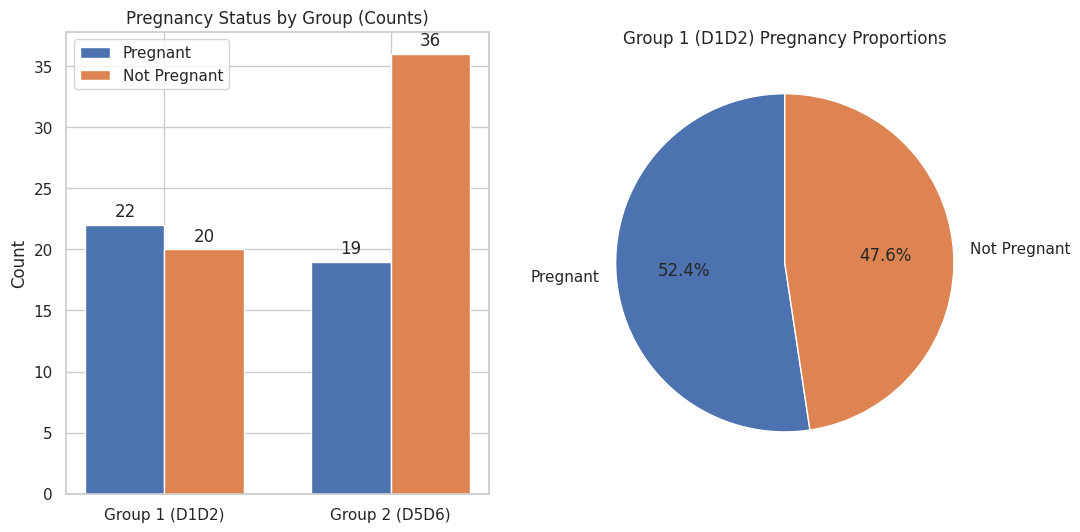

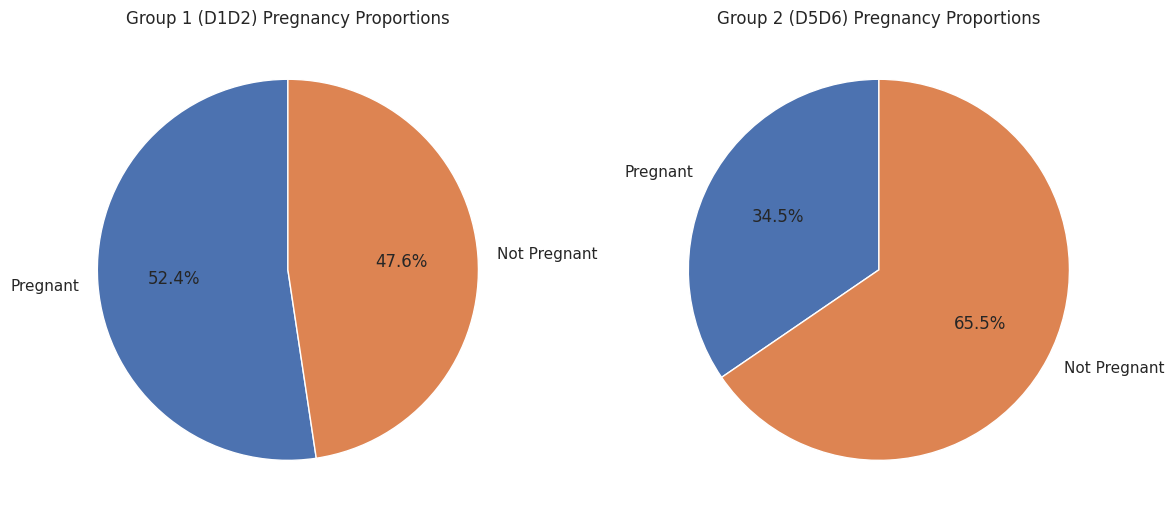

In [ ]:
# prompt: visualize these two data in a multiple bar diagram or in a pie diagram

import numpy as np
import matplotlib.pyplot as plt

# Data for visualization
labels = ['Group 1 (D1D2)', 'Group 2 (D5D6)']
pregnant_counts = [count1, count2]
not_pregnant_counts = [nobs1 - count1, nobs2 - count2]
proportions = [prop1, prop2]

# Create a multiple bar diagram
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot of counts
bar_width = 0.35
x = np.arange(len(labels))
rects1 = ax[0].bar(x - bar_width/2, pregnant_counts, bar_width, label='Pregnant')
rects2 = ax[0].bar(x + bar_width/2, not_pregnant_counts, bar_width, label='Not Pregnant')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('Count')
ax[0].set_title('Pregnancy Status by Group (Counts)')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()

# Function to auto-label bars
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, ax[0])
autolabel(rects2, ax[0])

# Pie chart of proportions for each group
# Pie chart for Group 1
ax[1].pie([prop1, 1 - prop1], labels=['Pregnant', 'Not Pregnant'], autopct='%1.1f%%', startangle=90)
ax[1].set_title('Group 1 (D1D2) Pregnancy Proportions')

# We could add a second pie chart for Group 2, or just show one as a representation.
# For a side-by-side comparison using pies, it's often better to have two separate charts.
# Alternatively, we can show a pie chart of the overall pooled proportions.
# Let's show two separate pies for clarity.

fig2, ax2 = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for Group 1
ax2[0].pie([prop1, 1 - prop1], labels=['Pregnant', 'Not Pregnant'], autopct='%1.1f%%', startangle=90)
ax2[0].set_title('Group 1 (D1D2) Pregnancy Proportions')

# Pie chart for Group 2
ax2[1].pie([prop2, 1 - prop2], labels=['Pregnant', 'Not Pregnant'], autopct='%1.1f%%', startangle=90)
ax2[1].set_title('Group 2 (D5D6) Pregnancy Proportions')


plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Group 1 data
group1_data = np.array([
    [6,4,4,2,2], [7,4,4,2,2], [13,11,11,7,1], [14,9,8,4,2],
    [13,10,10,8,1], [8,7,7,3,2], [4,3,3,1,2], [14,10,10,10,2],
    [9,6,6,6,4], [8,6,4,2,2], [8,6,4,2,2], [8,7,7,2,2],
    [5,3,3,1,1], [12,8,8,7,2], [15,11,8,7,4], [14,12,12,9,2],
    [19,12,12,10,2], [7,5,5,4,2], [14,7,7,4,2], [15,11,9,8,3],
    [17,14,12,12,1], [8,6,6,5,4], [20,15,12,5,4], [13,9,8,6,2],
    [12,9,9,8,2], [12,9,8,3,2], [10,8,7,5,4], [17,14,12,12,0],
    [15,10,4,2,2], [12,9,9,2,2], [6,4,4,3,2], [14,10,10,3,2],
    [15,13,11,7,2], [14,10,10,2,2], [14,12,12,9,2], [19,17,15,7,0],
    [6,4,4,2,2], [17,5,5,2,0], [14,10,8,3,2], [11,7,6,4,2],
    [12,9,9,5,2], [4,2,2,2,2], [12,2,2,2,2], [6,4,4,3,2],
    [3,2,2,1,2]
])

# Group 2 data
group2_data = np.array([
    [12,12,12,6,6], [13,11,11,8,4], [8,4,4,2,2], [7,5,5,3,2],
    [11,7,7,2,2], [12,8,8,4,2], [11,7,7,3,2], [12,9,9,3,3],
    [20,15,13,7,2], [11,9,9,5,4], [7,4,4,1,1], [10,5,5,2,4],
    [4,3,3,1,1], [20,15,15,8,2], [13,8,8,4,3], [9,6,6,4,2],
    [10,7,7,4,4], [5,4,4,2,1], [7,4,4,2,2], [7,5,5,3,2],
    [8,5,4,2,2], [15,11,11,8,2], [4,3,3,1,1], [14,10,10,6,2],
    [6,5,4,2,2], [4,3,3,2,1], [11,8,8,4,2], [9,7,6,2,4],
    [6,4,4,2,2], [11,7,6,1,1], [6,3,3,1,2], [5,3,3,1,2],
    [7,5,4,2,4], [7,3,3,3,1], [5,3,3,1,1], [6,4,4,2,2],
    [10,8,6,2,3], [16,12,7,3,2], [6,4,4,1,2], [7,4,3,2,2],
    [7,5,3,3,2], [9,7,7,3,1], [12,10,5,2,2], [10,8,8,5,2],
    [9,7,6,1,2], [13,10,9,3,4], [8,3,3,2,2], [12,10,9,7,2],
    [2,2,2,1,2], [5,4,4,1,5], [8,6,6,3,2], [12,4,4,1,2],
    [5,4,4,2,2], [3,2,2,1,2], [5,3,3,1,2]
])

# Variable names
variables = [
    "Oocyte Recovery",
    "Oocyte Fertilised (2PN)",
    "Total D3 Embryo",
    "Top Quality Embryos/Blastocysts",
    "Embryos/Blastocysts Transferred"
]

# Perform t-tests for each variable
results = []
for i in range(5):
    g1 = group1_data[:, i]
    g2 = group2_data[:, i]

    # Check for normality (Shapiro-Wilk test)
    _, p_g1 = stats.shapiro(g1)
    _, p_g2 = stats.shapiro(g2)
    normal = (p_g1 > 0.05) and (p_g2 > 0.05)

    # Check for equal variance (Levene's test)
    _, p_var = stats.levene(g1, g2)
    equal_var = p_var > 0.05

    # Independent t-test
    t_stat, p_val = stats.ttest_ind(g1, g2, equal_var=equal_var)

    # Calculate means and standard deviations
    mean1, mean2 = np.mean(g1), np.mean(g2)
    std1, std2 = np.std(g1, ddof=1), np.std(g2, ddof=1)
    diff = mean1 - mean2

    # Calculate 95% CI for difference
    n1, n2 = len(g1), len(g2)
    pooled_std = np.sqrt(((n1-1)*std1**2 + (n2-1)*std2**2)/(n1+n2-2))
    margin = stats.t.ppf(0.975, n1+n2-2) * pooled_std * np.sqrt(1/n1 + 1/n2)
    ci_low = diff - margin
    ci_high = diff + margin

    results.append({
        'Variable': variables[i],
        'Group 1 Mean': mean1,
        'Group 2 Mean': mean2,
        'Difference': diff,
        'Group 1 SD': std1,
        'Group 2 SD': std2,
        't-statistic': t_stat,
        'p-value': p_val,
        '95% CI Lower': ci_low,
        '95% CI Upper': ci_high,
        'Normal Distribution': normal,
        'Equal Variances': equal_var
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(results_df)

# Interpretation
print("\n=== Key Findings ===")
for i, row in results_df.iterrows():
    print(f"\nVariable: {row['Variable']}")
    print(f"Group 1 Mean ± SD: {row['Group 1 Mean']:.2f} ± {row['Group 1 SD']:.2f}")
    print(f"Group 2 Mean ± SD: {row['Group 2 Mean']:.2f} ± {row['Group 2 SD']:.2f}")
    print(f"Difference: {row['Difference']:.2f} (95% CI: {row['95% CI Lower']:.2f} to {row['95% CI Upper']:.2f})")
    print(f"t({len(group1_data)+len(group2_data)-2}) = {row['t-statistic']:.2f}, p = {row['p-value']:.4f}")
    if row['p-value'] < 0.05:
        print("--> Statistically significant difference (p < 0.05)")
    else:
        print("--> No statistically significant difference (p ≥ 0.05)")
    if not row['Normal Distribution']:
        print("Warning: Data may not be normally distributed - consider non-parametric test")
    if not row['Equal Variances']:
        print("Note: Unequal variances detected - Welch's t-test was used")

                          Variable  Group 1 Mean  Group 2 Mean  Difference  Group 1 SD  Group 2 SD  t-statistic   p-value  95% CI Lower  95% CI Upper  Normal Distribution  Equal Variances
0                  Oocyte Recovery     11.466667      8.945455    2.521212    4.372434    3.884529     3.051231  0.002932      0.881460      4.160965                False             True
1          Oocyte Fertilised (2PN)      8.133333      6.272727    1.860606    3.714835    3.199853     2.690331  0.008392      0.488168      3.233044                False             True
2                  Total D3 Embryo      7.400000      5.818182    1.581818    3.326204    2.963300     2.513041  0.013601      0.332707      2.830929                False             True
3  Top Quality Embryos/Blastocysts      4.755556      2.872727    1.882828    3.053728    1.972539     3.571170  0.000637      0.879169      2.886488                False            False
4  Embryos/Blastocysts Transferred      2.022222      2.2727

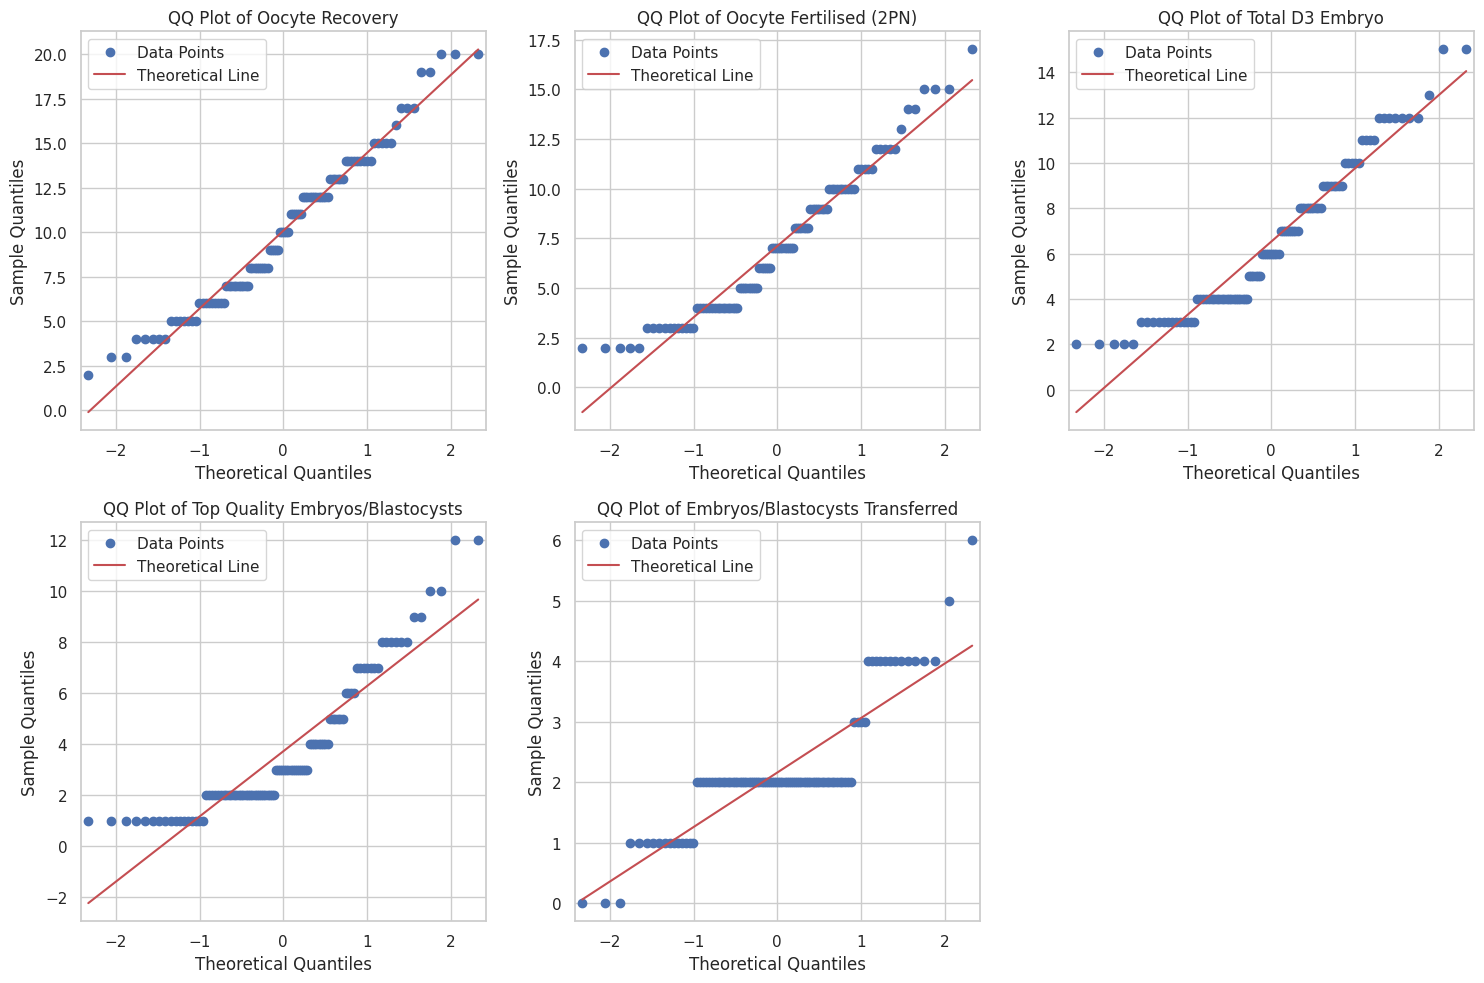

In [ ]:
# prompt: Make one dataset combining 2 group data variable and then plot QQplot on each variable with legend of the theoritical distribution line

import numpy as np
from statsmodels.graphics.api import qqplot
import matplotlib.pyplot as plt

# Combine the datasets
all_data = np.vstack((group1_data, group2_data))

# Create QQ plots for each variable
plt.figure(figsize=(15, 10))

for i, var_name in enumerate(variables):
    plt.subplot(2, 3, i + 1)  # Arrange plots in a 2x3 grid
    data_col = all_data[:, i]

    # Generate QQ plot against normal distribution
    qqplot(data_col, line='r', ax=plt.gca()) # 'r' draws a red reference line (theoretical line)
    plt.title(f'QQ Plot of {var_name}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    # Add legend manually
    plt.legend(['Data Points', 'Theoretical Line'], loc='best')


# Remove any unused subplots
if len(variables) < 6:
    for j in range(len(variables), 6):
        plt.subplot(2, 3, j + 1).axis('off')


plt.tight_layout()
plt.show()

In [ ]:

import pandas as pd
import numpy as np
# # Add the new parameters to the results DataFrame
# results_df['Proportion of oocytes which fertilized'] = group1_data[:, 1] / group1_data[:, 0]
# results_df['Proportion of top quality embryos formed'] = group1_data[:, 3] / group1_data[:, 2]

# For Group 2 data, create a similar structure and then potentially combine or analyze separately
# This assumes you want to calculate these proportions for each row (which represents a subject or cycle)

# If you want to add these as new columns to the results_df where each row in results_df
# corresponds to a variable (as it currently is), this approach needs modification.
# The current results_df summarizes stats for each variable across all rows.
# If the task means calculate these proportions for *each* row of the original data and
# then summarize *those* proportions (e.g., mean, std dev, t-test), we need to do that.

# Let's assume the task means calculating these for each *row* of the original data
# and then potentially summarizing or adding them back as columns to the original data or a new summary table.

# Calculate for Group 1 data
group1_fertilization_prop = group1_data[:, 1] / group1_data[:, 0]
# group1_fertilization_prop.isna.sum()
# Handle division by zero if Oocyte Recovery is 0
# group1_fertilization_prop = np.nan_to_num(group1_fertilization_prop, nan=0)

group1_top_embryo_prop = group1_data[:, 3] / group1_data[:, 2]
# group1_top_embryo_prop.isna.sum()
# Handle division by zero if Total D3 Embryo is 0
# group1_top_embryo_prop = np.nan_to_num(group1_top_embryo_prop, nan=0)


# Calculate for Group 2 data
group2_fertilization_prop = group2_data[:, 1] / group2_data[:, 0]
# Handle division by zero if Oocyte Recovery is 0
group2_fertilization_prop = np.nan_to_num(group2_fertilization_prop, nan=0)

group2_top_embryo_prop = group2_data[:, 3] / group2_data[:, 2]
# Handle division by zero if Total D3 Embryo is 0
group2_top_embryo_prop = np.nan_to_num(group2_top_embryo_prop, nan=0)

# Now you have arrays containing the calculated proportions for each row in each group.
# You could add these as new columns to the original data arrays if desired,
# or calculate summary statistics (like mean, median) and perform t-tests on these new proportions.

# Example: Summarize the new proportions
print("\n=== Summary of New Proportions ===")
print(f"Group 1 - Mean Fertilization Proportion: {np.mean(group1_fertilization_prop):.4f}")
print(f"Group 2 - Mean Fertilization Proportion: {np.mean(group2_fertilization_prop):.4f}")
print(f"Group 1 - Mean Top Quality Embryo Proportion: {np.mean(group1_top_embryo_prop):.4f}")
print(f"Group 2 - Mean Top Quality Embryo Proportion: {np.mean(group2_top_embryo_prop):.4f}")

# Example: Perform t-test on the new proportions
# Fertilization Proportion t-test
t_stat_fert, p_val_fert = stats.ttest_ind(group1_fertilization_prop, group2_fertilization_prop)
print(f"\nFertilization Proportion t-test: t = {t_stat_fert:.4f}, p = {p_val_fert:.4f}")

# Top Quality Embryo Proportion t-test
t_stat_embryo, p_val_embryo = stats.ttest_ind(group1_top_embryo_prop, group2_top_embryo_prop)
print(f"Top Quality Embryo Proportion t-test: t = {t_stat_embryo:.4f}, p = {p_val_embryo:.4f}")


=== Summary of New Proportions ===
Group 1 - Mean Fertilization Proportion: 0.7032
Group 2 - Mean Fertilization Proportion: 0.6964
Group 1 - Mean Top Quality Embryo Proportion: 0.6325
Group 2 - Mean Top Quality Embryo Proportion: 0.4829

Fertilization Proportion t-test: t = 0.2552, p = 0.7991
Top Quality Embryo Proportion t-test: t = 3.6139, p = 0.0005


In [ ]:

# Calculate 95% Confidence Interval for Fertilization Proportion difference
# Since we are comparing the means of two groups of proportions, we can use the t-distribution for the CI.
mean_fert1, mean_fert2 = np.mean(group1_fertilization_prop), np.mean(group2_fertilization_prop)
std_fert1, std_fert2 = np.std(group1_fertilization_prop, ddof=1), np.std(group2_fertilization_prop, ddof=1)
n_fert1, n_fert2 = len(group1_fertilization_prop), len(group2_fertilization_prop)

# Welch-Satterthwaite degrees of freedom for unequal variances (used by ttest_ind by default if equal_var=False)
# However, let's calculate the pooled std and df if we assume equal variance for CI calculation,
# similar to how it was done for the other variables.
# We should check for equal variances for these proportions as well if we were being strict.
# For simplicity here, let's calculate CI assuming equal variance for demonstration,
# but note that the t-test uses unequal variances by default if appropriate.

# Pooled standard deviation for Fertilization Proportion
pooled_std_fert = np.sqrt(((n_fert1-1)*std_fert1**2 + (n_fert2-1)*std_fert2**2)/(n_fert1+n_fert2-2))
df_fert = n_fert1 + n_fert2 - 2
margin_fert = stats.t.ppf(0.975, df_fert) * pooled_std_fert * np.sqrt(1/n_fert1 + 1/n_fert2)
ci_low_fert = (mean_fert1 - mean_fert2) - margin_fert
ci_high_fert = (mean_fert1 - mean_fert2) + margin_fert

print(f"Fertilization Proportion 95% CI: ({ci_low_fert:.4f}, {ci_high_fert:.4f})")

# Interpretation for Fertilization Proportion
print("\n=== Fertilization Proportion Interpretation ===")
print(f"The mean fertilization proportion in Group 1 is {mean_fert1:.4f} and in Group 2 is {mean_fert2:.4f}.")
print(f"The calculated t-statistic is {t_stat_fert:.4f} with a p-value of {p_val_fert:.4f}.")

if p_val_fert < 0.05:
    print("Since the p-value ({:.4f}) is less than 0.05, we reject the null hypothesis.".format(p_val_fert))
    print("There is a statistically significant difference in the mean fertilization proportion between Group 1 and Group 2.")
else:
    print("Since the p-value ({:.4f}) is greater than or equal to 0.05, we fail to reject the null hypothesis.".format(p_val_fert))
    print("There is no statistically significant difference in the mean fertilization proportion between Group 1 and Group 2.")

print(f"We are 95% confident that the true difference in mean fertilization proportion between Group 1 and Group 2 lies between {ci_low_fert:.4f} and {ci_high_fert:.4f}.")


# Calculate 95% Confidence Interval for Top Quality Embryo Proportion difference
mean_embryo1, mean_embryo2 = np.mean(group1_top_embryo_prop), np.mean(group2_top_embryo_prop)
std_embryo1, std_embryo2 = np.std(group1_top_embryo_prop, ddof=1), np.std(group2_top_embryo_prop, ddof=1)
n_embryo1, n_embryo2 = len(group1_top_embryo_prop), len(group2_top_embryo_prop)

# Pooled standard deviation for Top Quality Embryo Proportion
pooled_std_embryo = np.sqrt(((n_embryo1-1)*std_embryo1**2 + (n_embryo2-1)*std_embryo2**2)/(n_embryo1+n_embryo2-2))
df_embryo = n_embryo1 + n_embryo2 - 2
margin_embryo = stats.t.ppf(0.975, df_embryo) * pooled_std_embryo * np.sqrt(1/n_embryo1 + 1/n_embryo2)
ci_low_embryo = (mean_embryo1 - mean_embryo2) - margin_embryo
ci_high_embryo = (mean_embryo1 - mean_embryo2) + margin_embryo

print(f"Top Quality Embryo Proportion 95% CI: ({ci_low_embryo:.4f}, {ci_high_embryo:.4f})")


# Interpretation for Top Quality Embryo Proportion
print("\n=== Top Quality Embryo Proportion Interpretation ===")
print(f"The mean top quality embryo proportion in Group 1 is {mean_embryo1:.4f} and in Group 2 is {mean_embryo2:.4f}.")
print(f"The calculated t-statistic is {t_stat_embryo:.4f} with a p-value of {p_val_embryo:.4f}.")

if p_val_embryo < 0.05:
    print("Since the p-value ({:.4f}) is less than 0.05, we reject the null hypothesis.".format(p_val_embryo))
    print("There is a statistically significant difference in the mean top quality embryo proportion between Group 1 and Group 2.")
else:
    print("Since the p-value ({:.4f}) is greater than or equal to 0.05, we fail to reject the null hypothesis.".format(p_val_embryo))
    print("There is no statistically significant difference in the mean top quality embryo proportion between Group 1 and Group 2.")

print(f"We are 95% confident that the true difference in mean top quality embryo proportion between Group 1 and Group 2 lies between {ci_low_embryo:.4f} and {ci_high_embryo:.4f}.")

Fertilization Proportion 95% CI: (-0.0465, 0.0602)

=== Fertilization Proportion Interpretation ===
The mean fertilization proportion in Group 1 is 0.7032 and in Group 2 is 0.6964.
The calculated t-statistic is 0.2552 with a p-value of 0.7991.
Since the p-value (0.7991) is greater than or equal to 0.05, we fail to reject the null hypothesis.
There is no statistically significant difference in the mean fertilization proportion between Group 1 and Group 2.
We are 95% confident that the true difference in mean fertilization proportion between Group 1 and Group 2 lies between -0.0465 and 0.0602.
Top Quality Embryo Proportion 95% CI: (0.0674, 0.2317)

=== Top Quality Embryo Proportion Interpretation ===
The mean top quality embryo proportion in Group 1 is 0.6325 and in Group 2 is 0.4829.
The calculated t-statistic is 3.6139 with a p-value of 0.0005.
Since the p-value (0.0005) is less than 0.05, we reject the null hypothesis.
There is a statistically significant difference in the mean top qu

<Figure size 1500x2000 with 0 Axes>

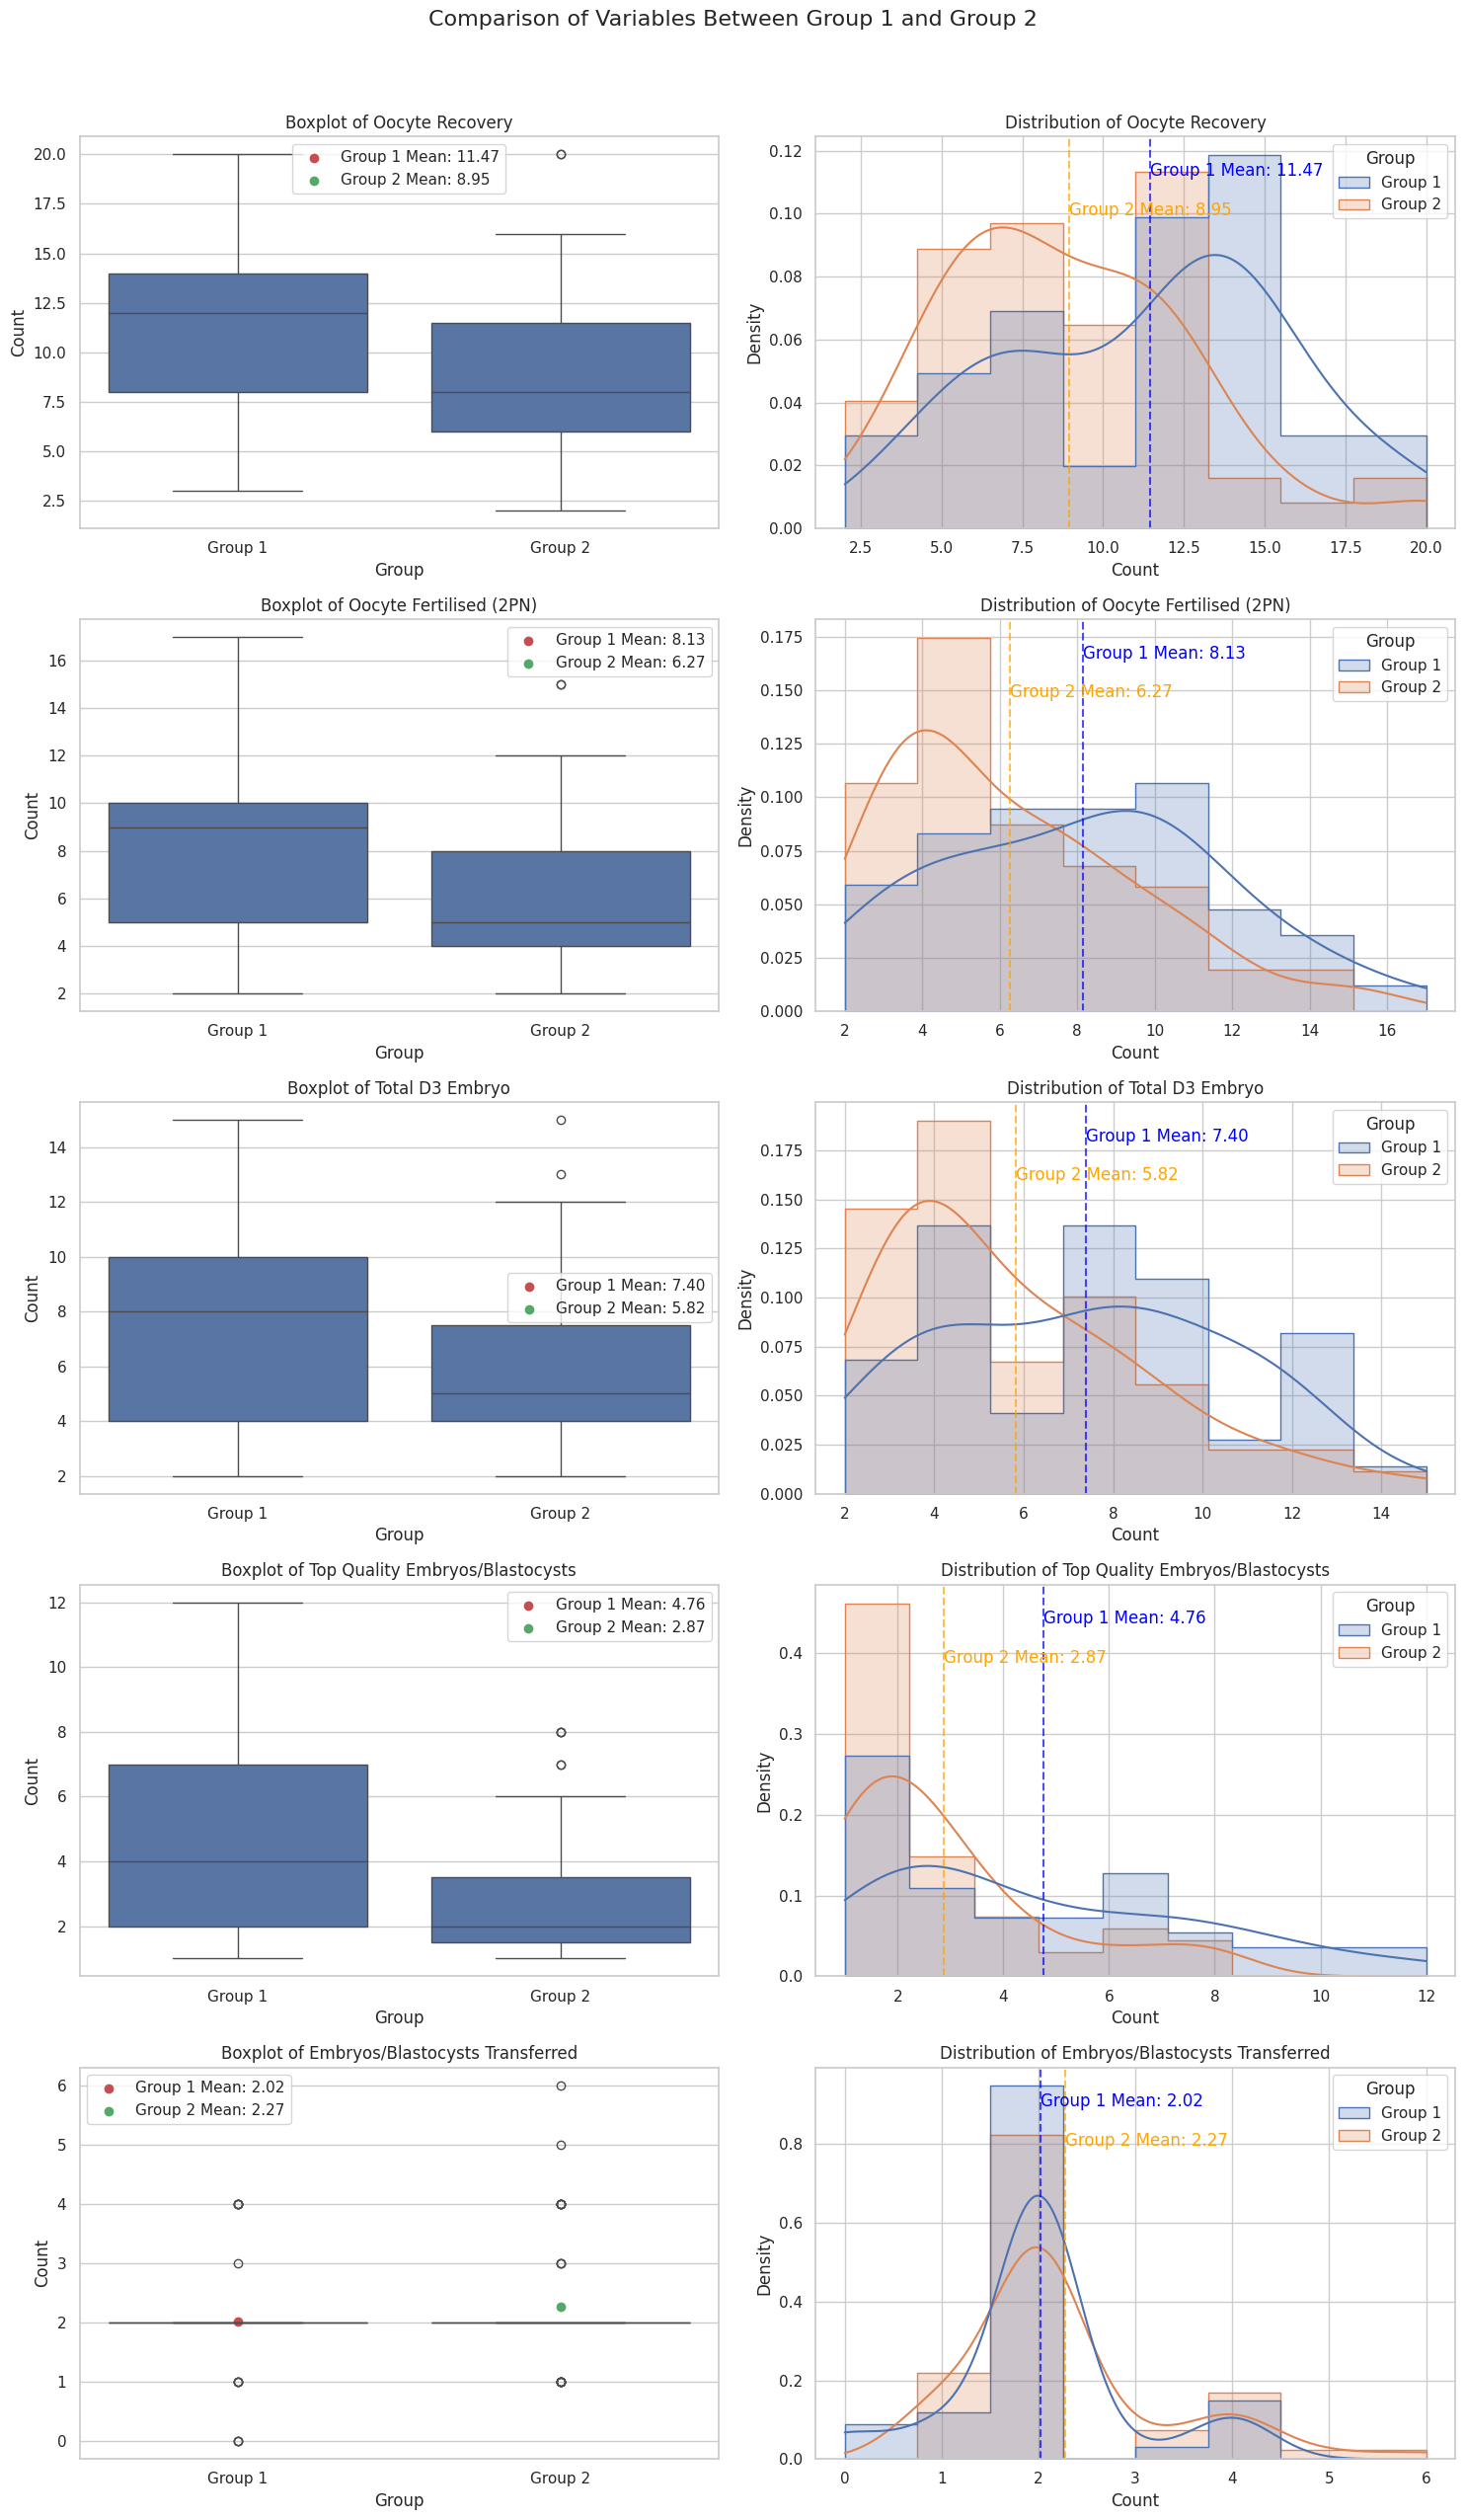

/tmp/ipython-input-63-2007684347.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y=var, data=combined_df, inner='quartile', palette='muted')
/tmp/ipython-input-63-2007684347.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y=var, data=combined_df, inner='quartile', palette='muted')
/tmp/ipython-input-63-2007684347.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y=var, data=combined_df, inner='quartile', palette='muted')
/tmp/ipython-input-63-2007684347.py:66: FutureWarning: 

Passing `p

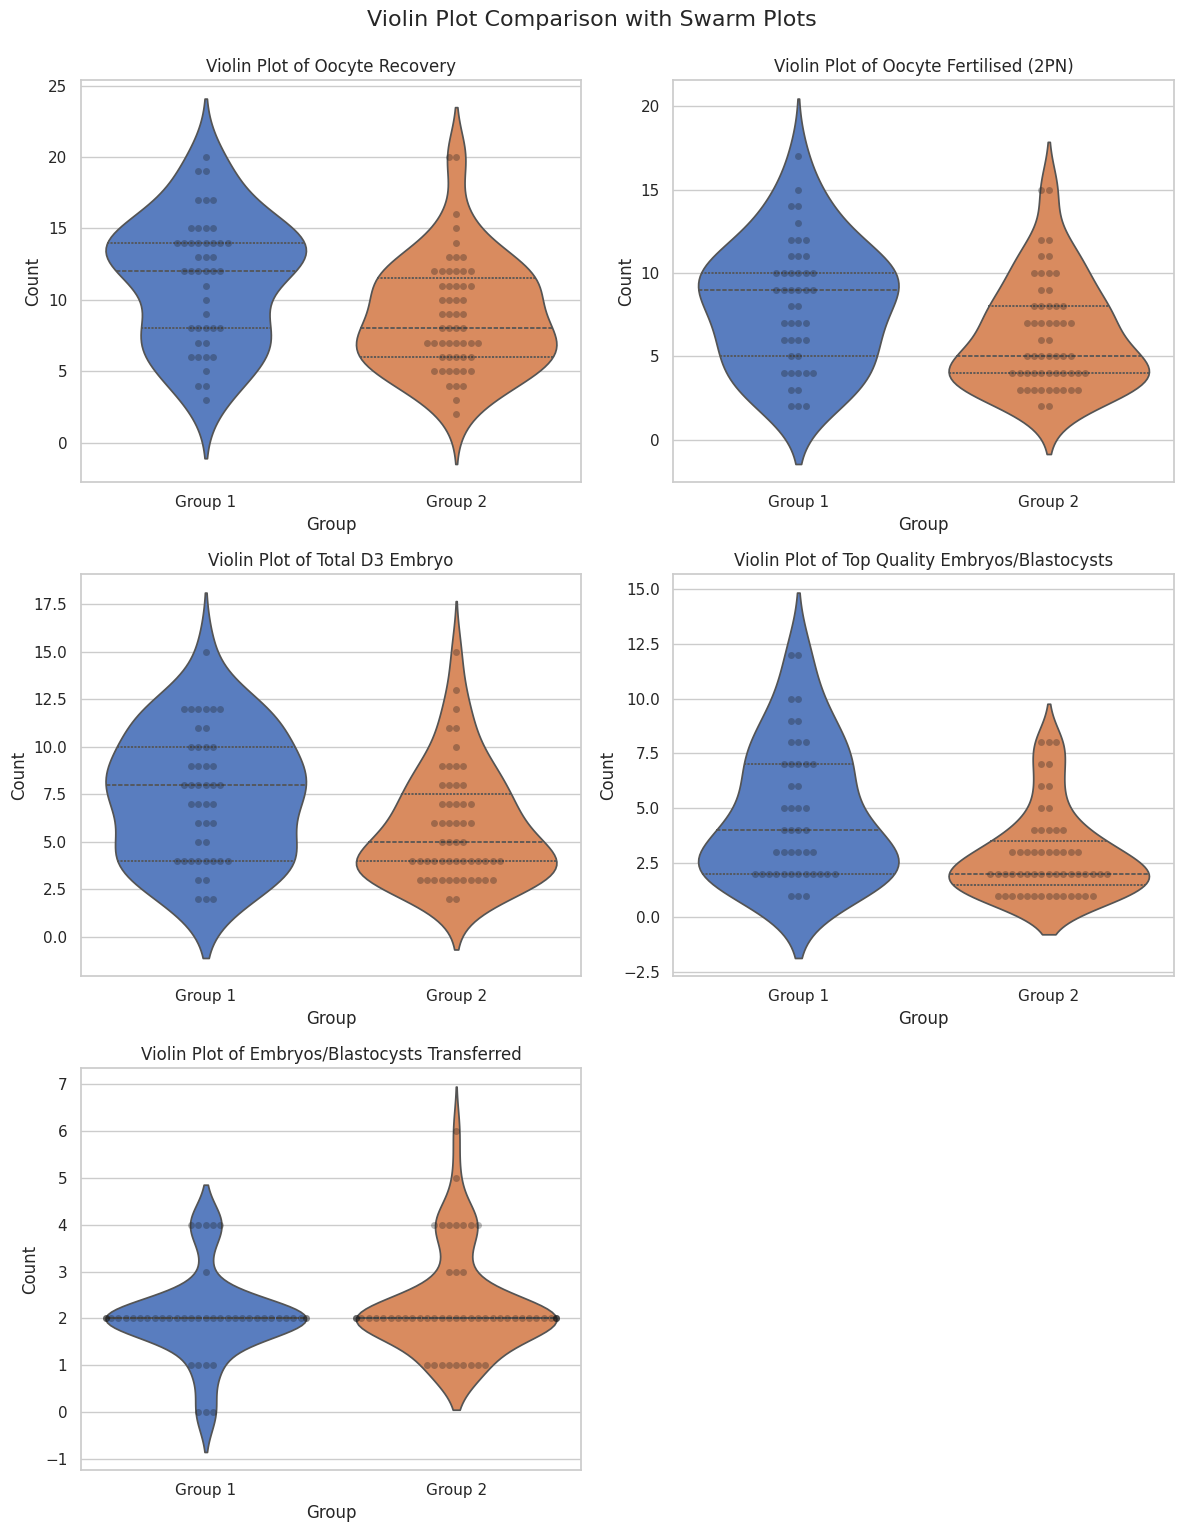

In [ ]:
### FOr comparison
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the plotting style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 20))

# Create a list of all variables
variables = [
    "Oocyte Recovery",
    "Oocyte Fertilised (2PN)",
    "Total D3 Embryo",
    "Top Quality Embryos/Blastocysts",
    "Embryos/Blastocysts Transferred"
]

# Create a DataFrame for plotting
group1_df = pd.DataFrame(group1_data, columns=variables)
group1_df['Group'] = 'Group 1'
group2_df = pd.DataFrame(group2_data, columns=variables)
group2_df['Group'] = 'Group 2'
combined_df = pd.concat([group1_df, group2_df])

# Create subplots for each variable
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
fig.suptitle('Comparison of Variables Between Group 1 and Group 2', y=1.02, fontsize=16)

for i, var in enumerate(variables):
    # Plot 1: Boxplot comparison
    sns.boxplot(x='Group', y=var, data=combined_df, ax=axes[i,0])
    axes[i,0].set_title(f'Boxplot of {var}')
    axes[i,0].set_ylabel('Count')

    # Add mean markers
    mean1 = group1_df[var].mean()
    mean2 = group2_df[var].mean()
    axes[i,0].scatter(0, mean1, color='r', label=f'Group 1 Mean: {mean1:.2f}')
    axes[i,0].scatter(1, mean2, color='g', label=f'Group 2 Mean: {mean2:.2f}')
    axes[i,0].legend()

    # Plot 2: Distribution comparison
    sns.histplot(data=combined_df, x=var, hue='Group', element='step',
                 stat='density', common_norm=False, kde=True, ax=axes[i,1])
    axes[i,1].set_title(f'Distribution of {var}')
    axes[i,1].set_xlabel('Count')

    # Add vertical lines for means
    axes[i,1].axvline(mean1, color='blue', linestyle='--', alpha=0.7)
    axes[i,1].axvline(mean2, color='orange', linestyle='--', alpha=0.7)

    # Add text annotations for means
    axes[i,1].text(mean1, axes[i,1].get_ylim()[1]*0.9,
                  f'Group 1 Mean: {mean1:.2f}', color='blue')
    axes[i,1].text(mean2, axes[i,1].get_ylim()[1]*0.8,
                  f'Group 2 Mean: {mean2:.2f}', color='orange')

plt.tight_layout()
plt.show()

# Create violin plots for a compact comparison
plt.figure(figsize=(12, 15))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    sns.violinplot(x='Group', y=var, data=combined_df, inner='quartile', palette='muted')
    sns.swarmplot(x='Group', y=var, data=combined_df, color='k', alpha=0.3)
    plt.title(f'Violin Plot of {var}')
    plt.ylabel('Count')

plt.tight_layout()
plt.suptitle('Violin Plot Comparison with Swarm Plots', y=1.02, fontsize=16)
plt.show()

  Variable Group 1 Mean ± SD Group 2 Mean ± SD    Difference (95% CI)  t-statistic   p-value  Normal Distribution  Equal Variances
0      AGE      29.13 ± 4.13      29.89 ± 4.55  -0.76 (-2.50 to 0.98)    -0.863127  0.390175                 True             True
1      BMI      24.48 ± 3.04      25.33 ± 3.16  -0.84 (-2.08 to 0.40)    -1.348995  0.180447                 True             True
2      AMH       6.74 ± 2.44       4.64 ± 2.48    2.10 (1.12 to 3.08)     4.246016  0.000050                False             True
3      TSH       2.70 ± 1.29       3.09 ± 1.76  -0.39 (-1.00 to 0.21)    -1.281614  0.203035                False            False


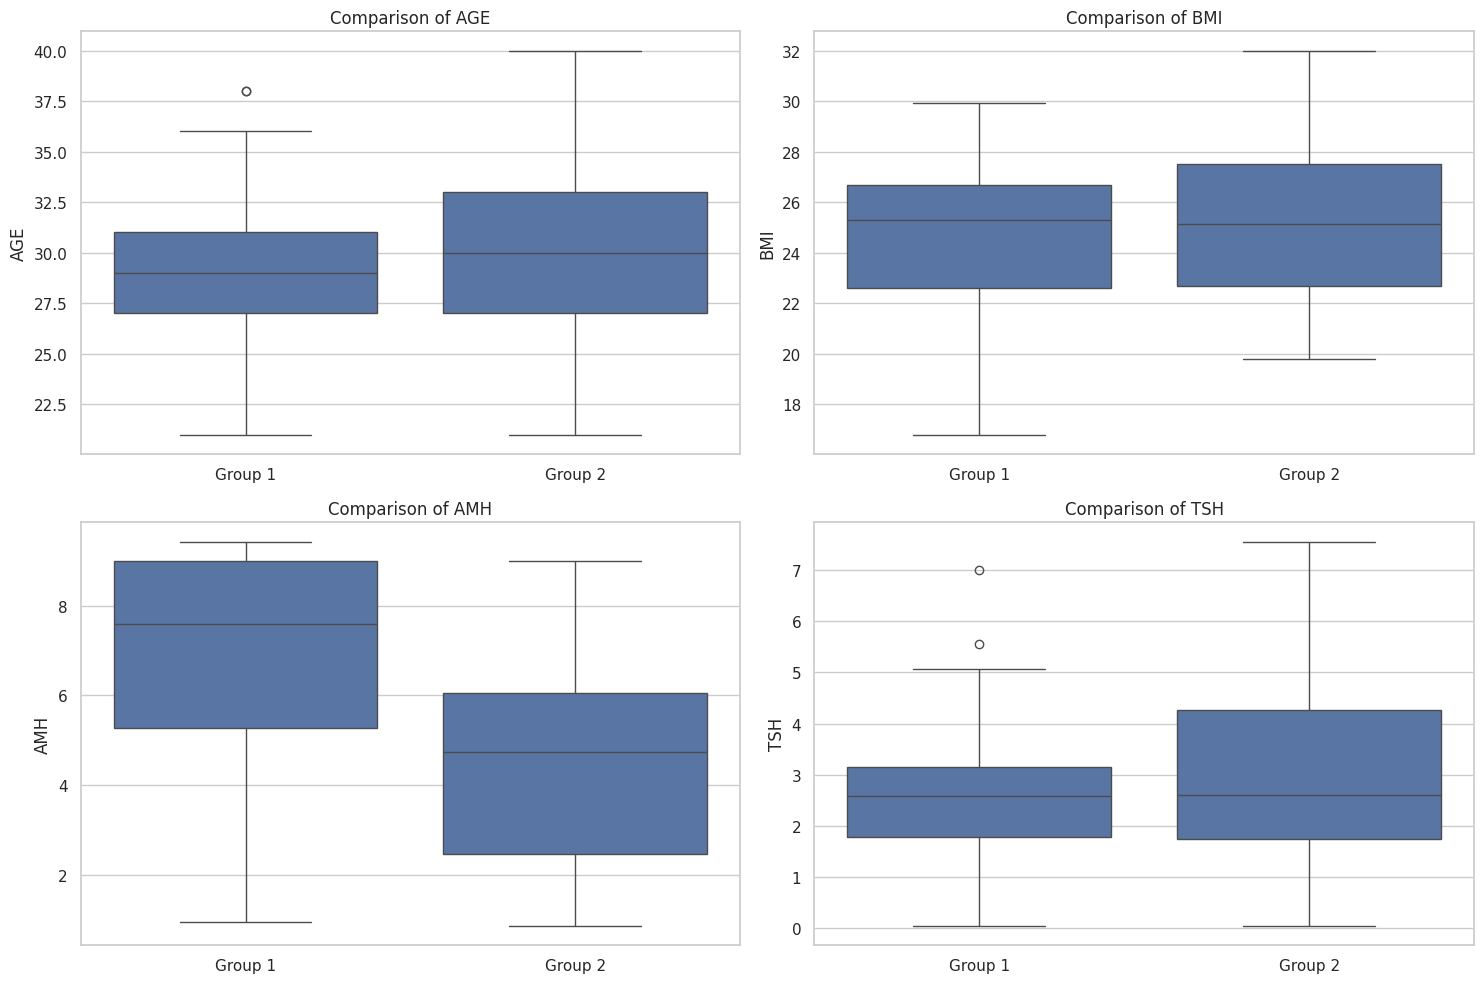

/tmp/ipython-input-64-3182805442.py:111: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group1_data[:,i-1], label='Group 1', shade=True)
/tmp/ipython-input-64-3182805442.py:112: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group2_data[:,i-1], label='Group 2', shade=True)
/tmp/ipython-input-64-3182805442.py:111: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group1_data[:,i-1], label='Group 1', shade=True)
/tmp/ipython-input-64-3182805442.py:112: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group2_da

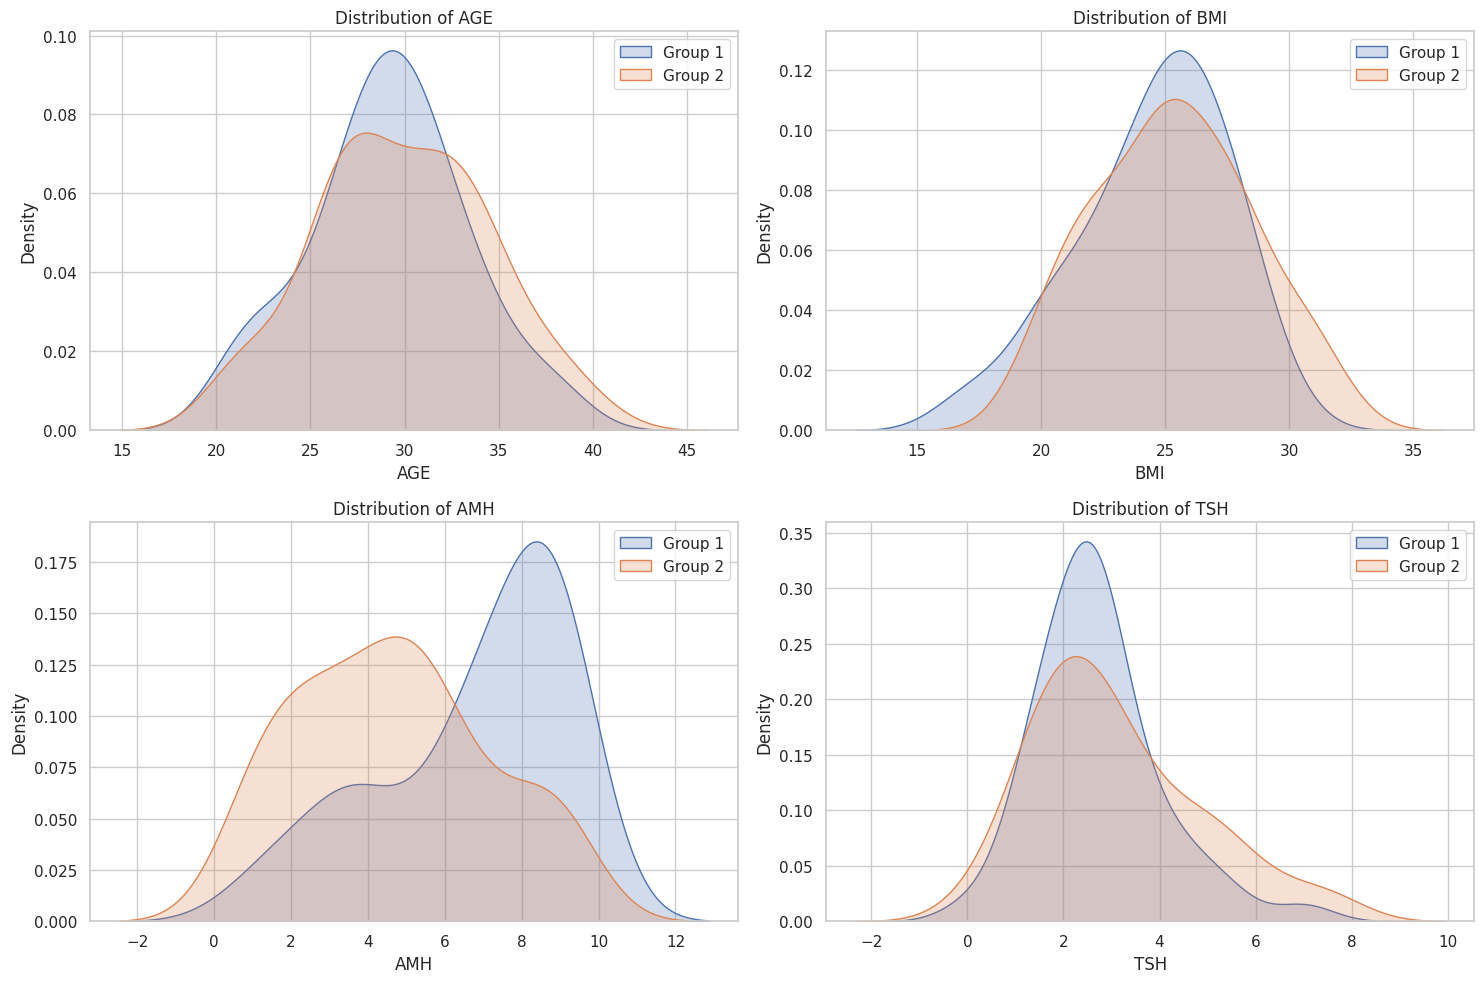

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Group 1 data
group1_data = np.array([
    [29,25.96,3.88,0.95], [29,22.5,7.87,7.01], [31,22.34,6.99,2.61], [23,19.4,9,2.4],
    [28,22.9,6.43,1.77], [35,29.91,5.28,2.86], [28,26,2.38,1.99], [27,25.7,4.19,2.26],
    [34,24.7,9,2.34], [38,19.6,8.37,3.84], [24,25.39,2.02,4.39], [31,28.2,6.43,1.01],
    [24,27.8,6.24,1.62], [26,27.76,3.59,2.08], [33,28.4,7.28,2.54], [26,20.8,8.5,5.06],
    [30,28.9,9,3.16], [21,24.2,3.26,2.27], [30,25.87,9,3.97], [22,27.3,7.73,3.1],
    [31,26.6,9,2.81], [30,24.12,7.49,2.06], [32,25.29,9,2.71], [34,26.8,9.43,2.34],
    [30,24.6,9,1.71], [27,24,9,2.51], [36,23.19,6.95,3.63], [33,25.4,8.7,2.61],
    [30,20.5,7.73,3.21], [31,28.2,3.73,0.05], [22,24.56,8.36,2.58], [29,22.6,8.58,3.01],
    [21,16.79,9,1.79], [32,25.55,3.17,1.16], [31,23.5,7.59,5.55], [26,27.4,9,2.7],
    [33,23.42,9,1.38], [27,25.63,6.51,1.78], [29,26.67,9,2.94], [38,27.09,0.96,3.29],
    [28,20.39,8.04,1.43], [29,17.6,6.25,4.76], [29,20.76,6.04,4.05], [27,25.6,4.08,1.34],
    [27,21.87,1.41,2.82]
])

# Group 2 data
group2_data = np.array([
    [34,25.96,5.34,2.46], [35,27.4,3.16,6.03], [34,25.22,8.55,0.05], [40,24.65,5.51,4.31],
    [29,25.5,6.9,3.55], [32,24.2,5.39,7.56], [30,22.5,8.81,5.13], [30,27.58,6.87,2.35],
    [35,22.28,5.03,3.06], [32,30.7,3.43,0.48], [28,28.53,1.01,1.31], [31,22.76,1.82,2.61],
    [38,28.76,2.61,2.78], [30,24.4,5.54,1.63], [26,21.6,6.36,5.29], [22,24.8,5.19,1.76],
    [36,30.9,2.27,1.43], [22,24.56,8.36,2.58], [26,28.72,5.49,1.77], [34,22.67,8.86,1.26],
    [27,23.43,4.97,4.62], [26,22.66,9,1.73], [33,32,1.09,6.08], [27,25.14,9,5.14],
    [30,25.14,3.64,4.29], [36,21.58,1.46,6.85], [25,30.42,4.69,3.59], [33,21,3.49,2.24],
    [34,30.7,1.99,3.56], [31,24.55,3.54,0.84], [27,30.38,6.7,3.29], [27,24.65,5.66,1.55],
    [32,24.8,4.28,3.45], [30,27.8,2.2,2.59], [27,27.39,5.56,1.72], [21,19.8,4.85,2.18],
    [28,26.3,1.7,2.96], [33,26.3,9,4.68], [21,19.8,4.85,2.18], [27,26.7,2.33,1.71],
    [32,24.8,4.46,3.06], [27,21.48,3.29,5.13], [33,28.5,7.61,3.16], [25,22.3,5.76,2.41],
    [32,25.1,9,7.55], [38,27.39,4.74,4.24], [27,26.7,2.33,2.14], [28,25.96,3.5,2.36],
    [27,22.16,7.05,0.82], [22,20.2,1.1,2.67], [33,27,3.22,1.37], [30,21.1,3.83,3.59],
    [38,19.83,0.87,2.07], [28,28.53,1.01,1.31], [25,27.7,1.06,5.46]
])

# Variable names
variables = ["AGE", "BMI", "AMH", "TSH"]

# Perform t-tests for each variable
results = []
for i in range(4):
    g1 = group1_data[:, i]
    g2 = group2_data[:, i]

    # Check for normality (Shapiro-Wilk test)
    _, p_g1 = stats.shapiro(g1)
    _, p_g2 = stats.shapiro(g2)
    normal = (p_g1 > 0.05) and (p_g2 > 0.05)

    # Check for equal variance (Levene's test)
    _, p_var = stats.levene(g1, g2)
    equal_var = p_var > 0.05

    # Independent t-test
    t_stat, p_val = stats.ttest_ind(g1, g2, equal_var=equal_var)

    # Calculate means and standard deviations
    mean1, mean2 = np.mean(g1), np.mean(g2)
    std1, std2 = np.std(g1, ddof=1), np.std(g2, ddof=1)
    diff = mean1 - mean2

    # Calculate 95% CI for difference
    n1, n2 = len(g1), len(g2)
    if equal_var:
        pooled_std = np.sqrt(((n1-1)*std1**2 + (n2-1)*std2**2)/(n1+n2-2))
        margin = stats.t.ppf(0.975, n1+n2-2) * pooled_std * np.sqrt(1/n1 + 1/n2)
    else:
        # Welch-Satterthwaite degrees of freedom
        df = (std1**2/n1 + std2**2/n2)**2 / ((std1**2/n1)**2/(n1-1) + (std2**2/n2)**2/(n2-1))
        margin = stats.t.ppf(0.975, df) * np.sqrt(std1**2/n1 + std2**2/n2)
    ci_low = diff - margin
    ci_high = diff + margin

    results.append({
        'Variable': variables[i],
        'Group 1 Mean ± SD': f"{mean1:.2f} ± {std1:.2f}",
        'Group 2 Mean ± SD': f"{mean2:.2f} ± {std2:.2f}",
        'Difference (95% CI)': f"{diff:.2f} ({ci_low:.2f} to {ci_high:.2f})",
        't-statistic': t_stat,
        'p-value': p_val,
        'Normal Distribution': normal,
        'Equal Variances': equal_var
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(results_df)

# Visualization
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=['Group 1']*len(group1_data) + ['Group 2']*len(group2_data),
                y=np.concatenate([group1_data[:,i-1], group2_data[:,i-1]]))
    plt.title(f'Comparison of {var}')
    plt.ylabel(var)
plt.tight_layout()
plt.show()

# Density plots
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(group1_data[:,i-1], label='Group 1', shade=True)
    sns.kdeplot(group2_data[:,i-1], label='Group 2', shade=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.legend()
plt.tight_layout()
plt.show()

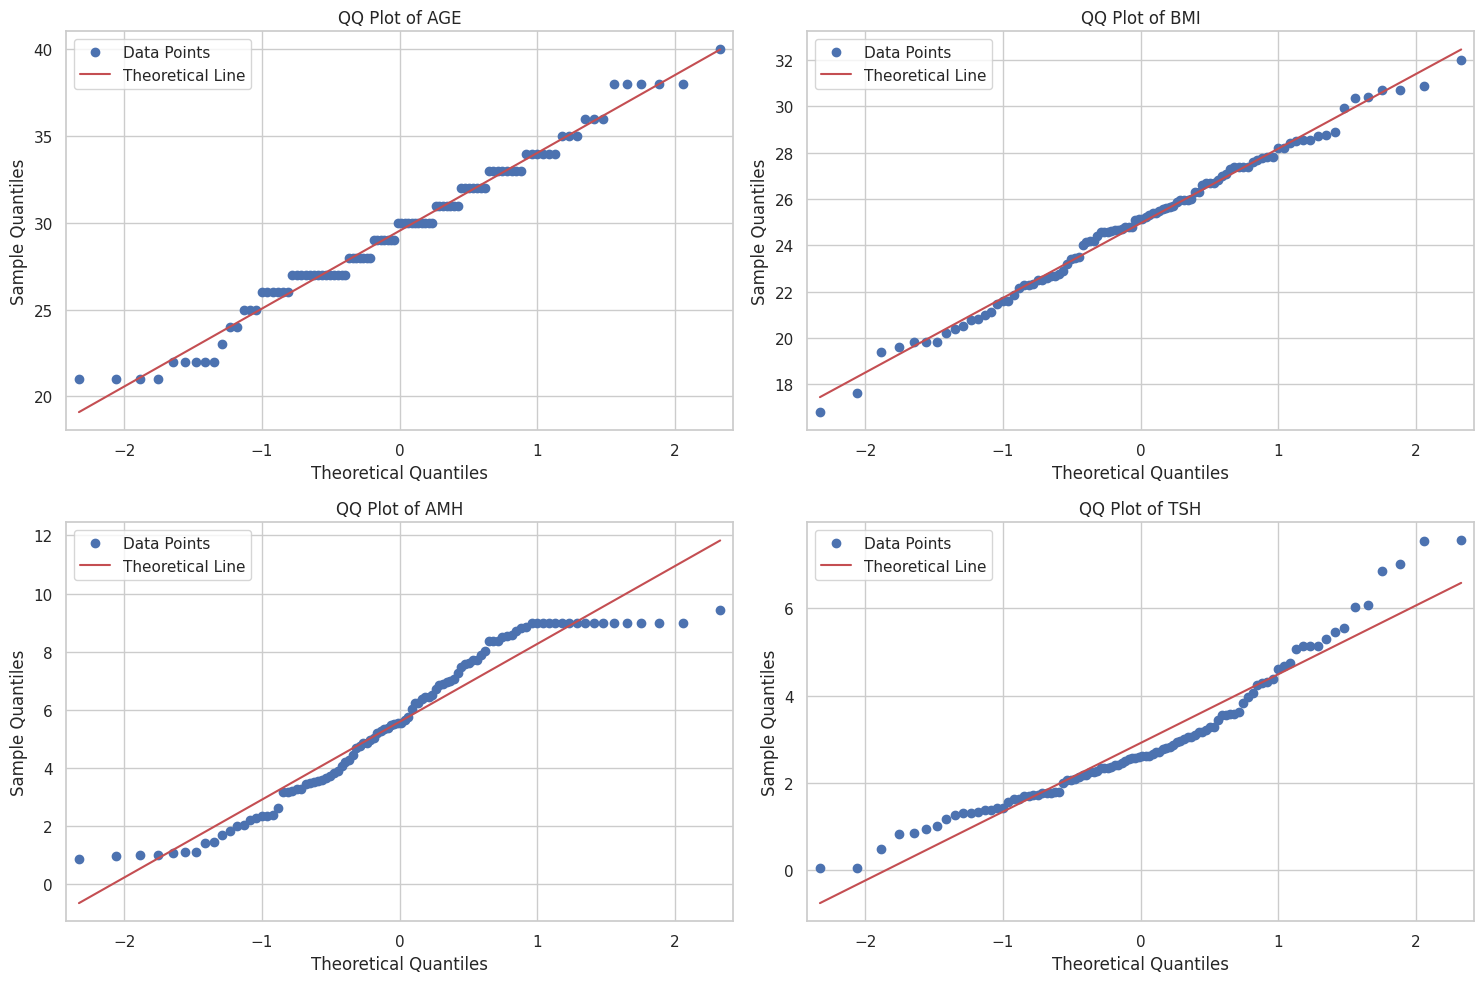

In [ ]:
# prompt: Make one dataset combining 2 group data variable and then plot QQplot on each variable with legend of the theoritical distribution line

import matplotlib.pyplot as plt
import numpy as np
# Combine the datasets
all_data = np.vstack((group1_data, group2_data))

# Create QQ plots for each variable
plt.figure(figsize=(15, 10))

for i, var_name in enumerate(variables):
    plt.subplot(2, 2, i + 1)  # Arrange plots in a 2x2 grid
    data_col = all_data[:, i]

    # Generate QQ plot against normal distribution
    qqplot(data_col, line='r', ax=plt.gca()) # 'r' draws a red reference line (theoretical line)
    plt.title(f'QQ Plot of {var_name}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    # Add legend manually
    plt.legend(['Data Points', 'Theoretical Line'], loc='best')

# Remove any unused subplots
if len(variables) < 4:
    for j in range(len(variables), 4):
        plt.subplot(2, 2, j + 1).axis('off')

plt.tight_layout()
plt.show()

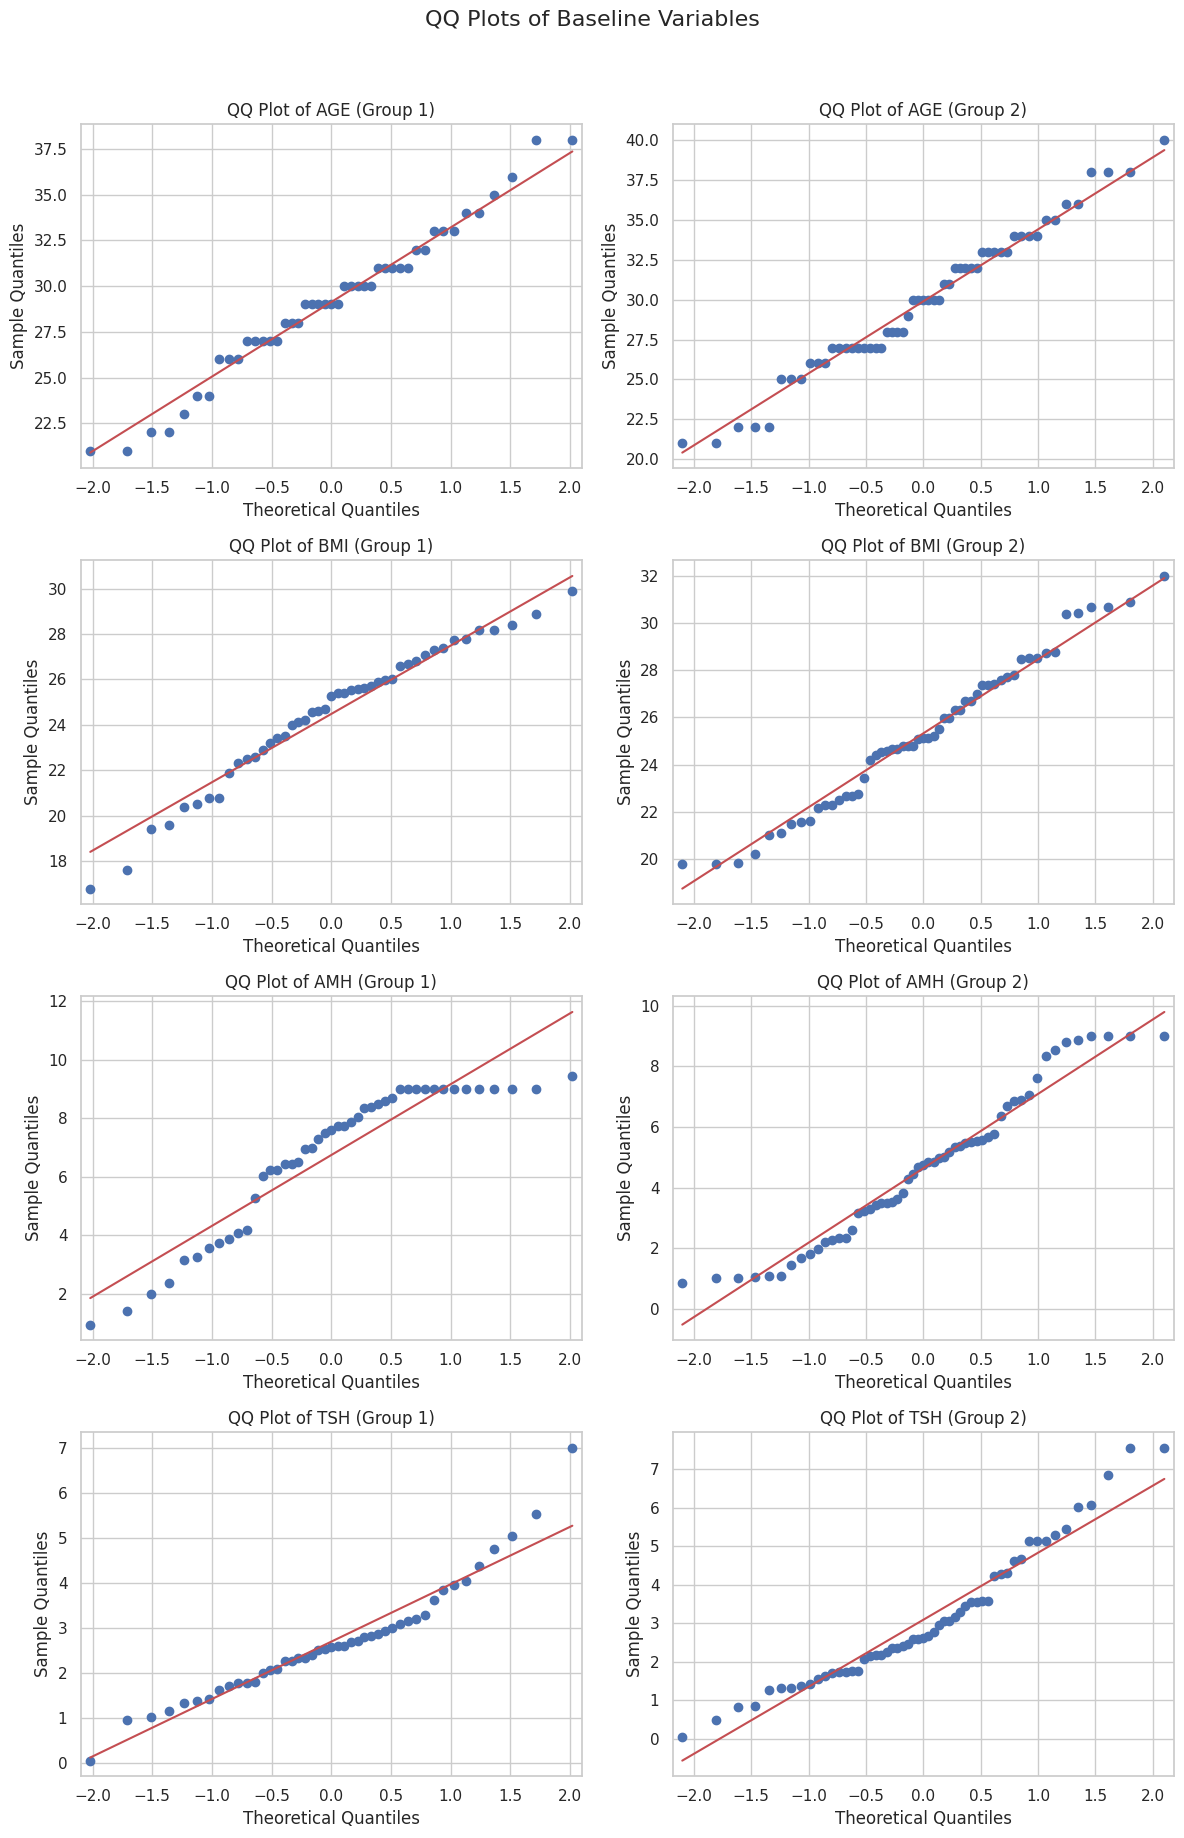

In [ ]:
# prompt: QQ plot for all the variables

from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

# Create QQ plots for each variable in Group 1 and Group 2
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 18))
fig.suptitle('QQ Plots of Baseline Variables', y=1.02, fontsize=16)

for i, var in enumerate(variables):
    # Group 1 QQ plot
    qqplot(group1_data[:, i], line='s', ax=axes[i, 0])
    axes[i, 0].set_title(f'QQ Plot of {var} (Group 1)')

    # Group 2 QQ plot
    qqplot(group2_data[:, i], line='s', ax=axes[i, 1])
    axes[i, 1].set_title(f'QQ Plot of {var} (Group 2)')

plt.tight_layout()
plt.show()

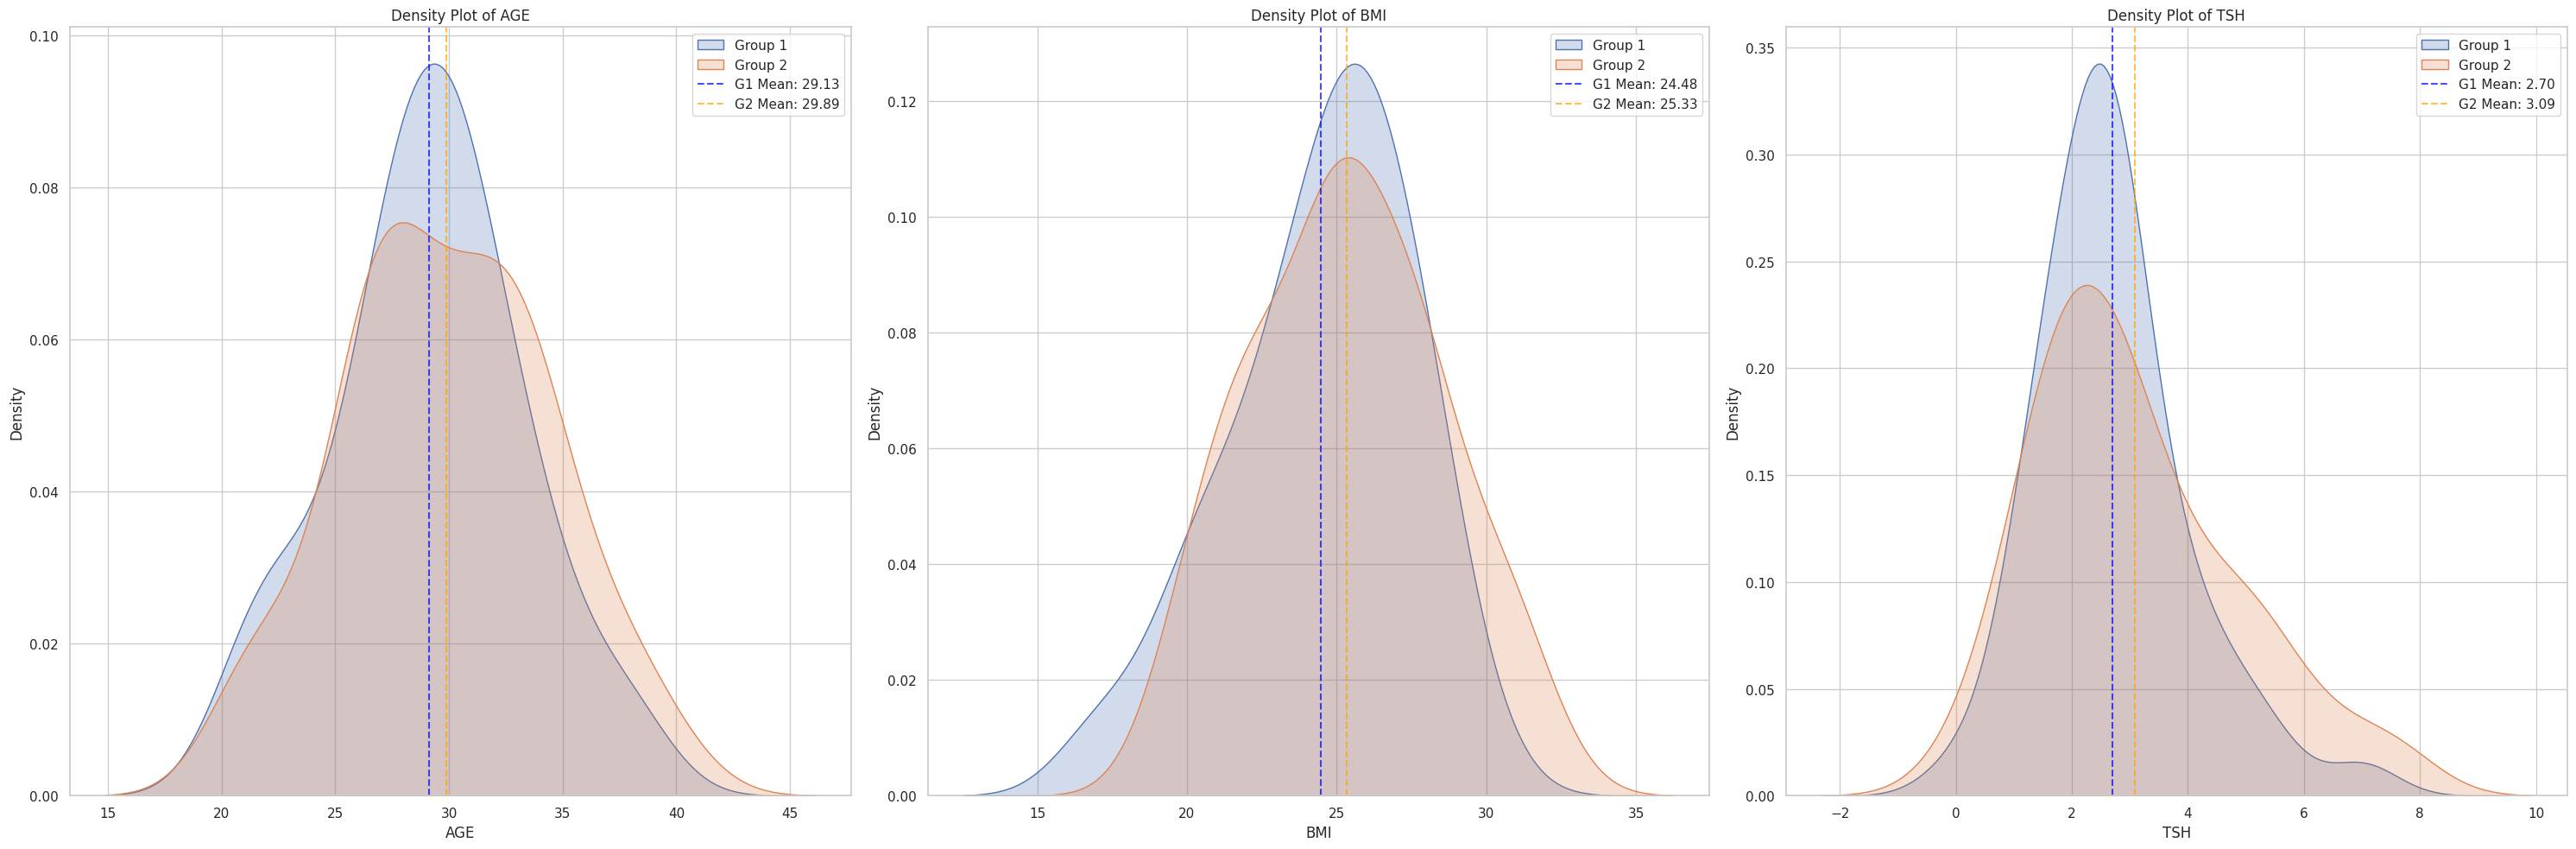

In [ ]:
# prompt: generate density plot with mean for all the other three variable aprat from the AMH

import matplotlib.pyplot as plt
import numpy as np
# Select variables other than AMH (index 2)
variables_for_density = [variables[i] for i in range(len(variables)) if i != 2]
indices_for_density = [i for i in range(len(variables)) if i != 2]

plt.figure(figsize=(30, 10)) # Adjust figure size for three plots

for i, var_index in enumerate(indices_for_density, 1):
    plt.subplot(1, 3, i) # Create 1 row, 3 columns of subplots
    sns.kdeplot(group1_data[:,var_index], label='Group 1', fill=True)
    sns.kdeplot(group2_data[:,var_index], label='Group 2', fill=True)

    # Add vertical lines for means
    mean1 = np.mean(group1_data[:,var_index])
    mean2 = np.mean(group2_data[:,var_index])
    plt.axvline(mean1, color='blue', linestyle='--', alpha=0.7, label=f'G1 Mean: {mean1:.2f}')
    plt.axvline(mean2, color='orange', linestyle='--', alpha=0.7, label=f'G2 Mean: {mean2:.2f}')


    plt.title(f'Density Plot of {variables[var_index]}')
    plt.xlabel(variables[var_index])
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

# Perform t-tests for each variable
results = []
for i in range(4):
    g1 = group1_data[:, i]
    g2 = group2_data[:, i]

    # Check for normality (Shapiro-Wilk test)
    _, p_g1 = stats.shapiro(g1)
    _, p_g2 = stats.shapiro(g2)
    normal = (p_g1 > 0.05) and (p_g2 > 0.05)

    # Check for equal variance (Levene's test)
    _, p_var = stats.levene(g1, g2)
    equal_var = p_var > 0.05

    # Independent t-test
    t_stat, p_val = stats.ttest_ind(g1, g2, equal_var=equal_var)

    # Calculate means and standard deviations
    mean1, mean2 = np.mean(g1), np.mean(g2)
    std1, std2 = np.std(g1, ddof=1), np.std(g2, ddof=1)
    diff = mean1 - mean2

    # Calculate 95% CI for difference
    n1, n2 = len(g1), len(g2)
    pooled_std = np.sqrt(((n1-1)*std1**2 + (n2-1)*std2**2)/(n1+n2-2))
    margin = stats.t.ppf(0.975, n1+n2-2) * pooled_std * np.sqrt(1/n1 + 1/n2)
    ci_low = diff - margin
    ci_high = diff + margin

    results.append({
        'Variable': variables[i],
        'Group 1 Mean': mean1,
        'Group 2 Mean': mean2,
        'Difference': diff,
        'Group 1 SD': std1,
        'Group 2 SD': std2,
        't-statistic': t_stat,
        'p-value': p_val,
        '95% CI Lower': ci_low,
        '95% CI Upper': ci_high,
        'Normal Distribution': normal,
        'Equal Variances': equal_var
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(results_df)

# Interpretation
print("\n=== Key Findings ===")
for i, row in results_df.iterrows():
    print(f"\nVariable: {row['Variable']}")
    print(f"Group 1 Mean ± SD: {row['Group 1 Mean']:.2f} ± {row['Group 1 SD']:.2f}")
    print(f"Group 2 Mean ± SD: {row['Group 2 Mean']:.2f} ± {row['Group 2 SD']:.2f}")
    print(f"Difference: {row['Difference']:.2f} (95% CI: {row['95% CI Lower']:.2f} to {row['95% CI Upper']:.2f})")
    print(f"t({len(group1_data)+len(group2_data)-2}) = {row['t-statistic']:.2f}, p = {row['p-value']:.4f}")
    if row['p-value'] < 0.05:
        print("--> Statistically significant difference (p < 0.05)")
    else:
        print("--> No statistically significant difference (p ≥ 0.05)")
    if not row['Normal Distribution']:
        print("Warning: Data may not be normally distributed - consider non-parametric test")
    if not row['Equal Variances']:
        print("Note: Unequal variances detected - Welch's t-test was used")

  Variable  Group 1 Mean  Group 2 Mean  Difference  Group 1 SD  Group 2 SD  t-statistic   p-value  95% CI Lower  95% CI Upper  Normal Distribution  Equal Variances
0      AGE     29.133333     29.890909   -0.757576    4.126412    4.552869    -0.863127  0.390175     -2.499363      0.984212                 True             True
1      BMI     24.483556     25.326909   -0.843354    3.042955    3.163917    -1.348995  0.180447     -2.083986      0.397279                 True             True
2      AMH      6.743556      4.642364    2.101192    2.443920    2.476467     4.246016  0.000050      1.119154      3.083229                False             True
3      TSH      2.698889      3.090727   -0.391838    1.292241    1.760737    -1.281614  0.203035     -1.017225      0.233549                False            False

=== Key Findings ===

Variable: AGE
Group 1 Mean ± SD: 29.13 ± 4.13
Group 2 Mean ± SD: 29.89 ± 4.55
Difference: -0.76 (95% CI: -2.50 to 0.98)
t(98) = -0.86, p = 0.3902
--> No stat

=== Data Overview ===
Total rows: 97

Group distribution:
Group
Group 2    55
Group 1    42
Name: count, dtype: int64

Data preview:


,Oocyte_Recovery,Oocyte_Fertilised_2PN,D3_Embryo,Top_Quality_Embryos,Group
0,6,4,4,2,Group 1
1,7,4,4,2,Group 1
2,13,11,11,7,Group 1
3,14,9,8,4,Group 1
4,13,10,10,8,Group 1



=== Variable Totals ===

Variable: Oocyte_Recovery
Group 1 total: 463
Group 2 total: 492
Combined total: 955

Variable: Oocyte_Fertilised_2PN
Group 1 total: 330
Group 2 total: 345
Combined total: 675

Variable: D3_Embryo
Group 1 total: 301
Group 2 total: 320
Combined total: 621

Variable: Top_Quality_Embryos
Group 1 total: 193
Group 2 total: 158
Combined total: 351

=== Normality Tests ===


,Group,Variable,Shapiro_Stat,Shapiro_p,Shapiro_Normal,KS_Stat,KS_p,KS_Normal
0,Group 1,Oocyte_Recovery,0.954104,9.066956e-02,True,0.163845,0.187506,True
1,Group 1,Oocyte_Fertilised_2PN,0.966247,2.457155e-01,True,0.130665,0.433405,True
2,Group 1,D3_Embryo,0.938199,2.472957e-02,False,0.154242,0.244102,True
3,Group 1,Top_Quality_Embryos,0.902691,1.734636e-03,False,0.185248,0.098185,True
4,Group 2,Oocyte_Recovery,0.949970,2.292896e-02,False,0.128115,0.301048,True
5,Group 2,Oocyte_Fertilised_2PN,0.906331,4.164004e-04,False,0.181864,0.045980,False
6,Group 2,D3_Embryo,0.891077,1.235631e-04,False,0.202976,0.018329,False
7,Group 2,Top_Quality_Embryos,0.816890,8.799199e-07,False,0.234550,0.003818,False



=== Box Plots ===


/tmp/ipython-input-69-1101172160.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=col, data=df, ax=axes[idx], palette="Set2")
/tmp/ipython-input-69-1101172160.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=col, data=df, ax=axes[idx], palette="Set2")
/tmp/ipython-input-69-1101172160.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=col, data=df, ax=axes[idx], palette="Set2")
/tmp/ipython-input-69-1101172160.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

<Figure size 1500x1000 with 0 Axes>

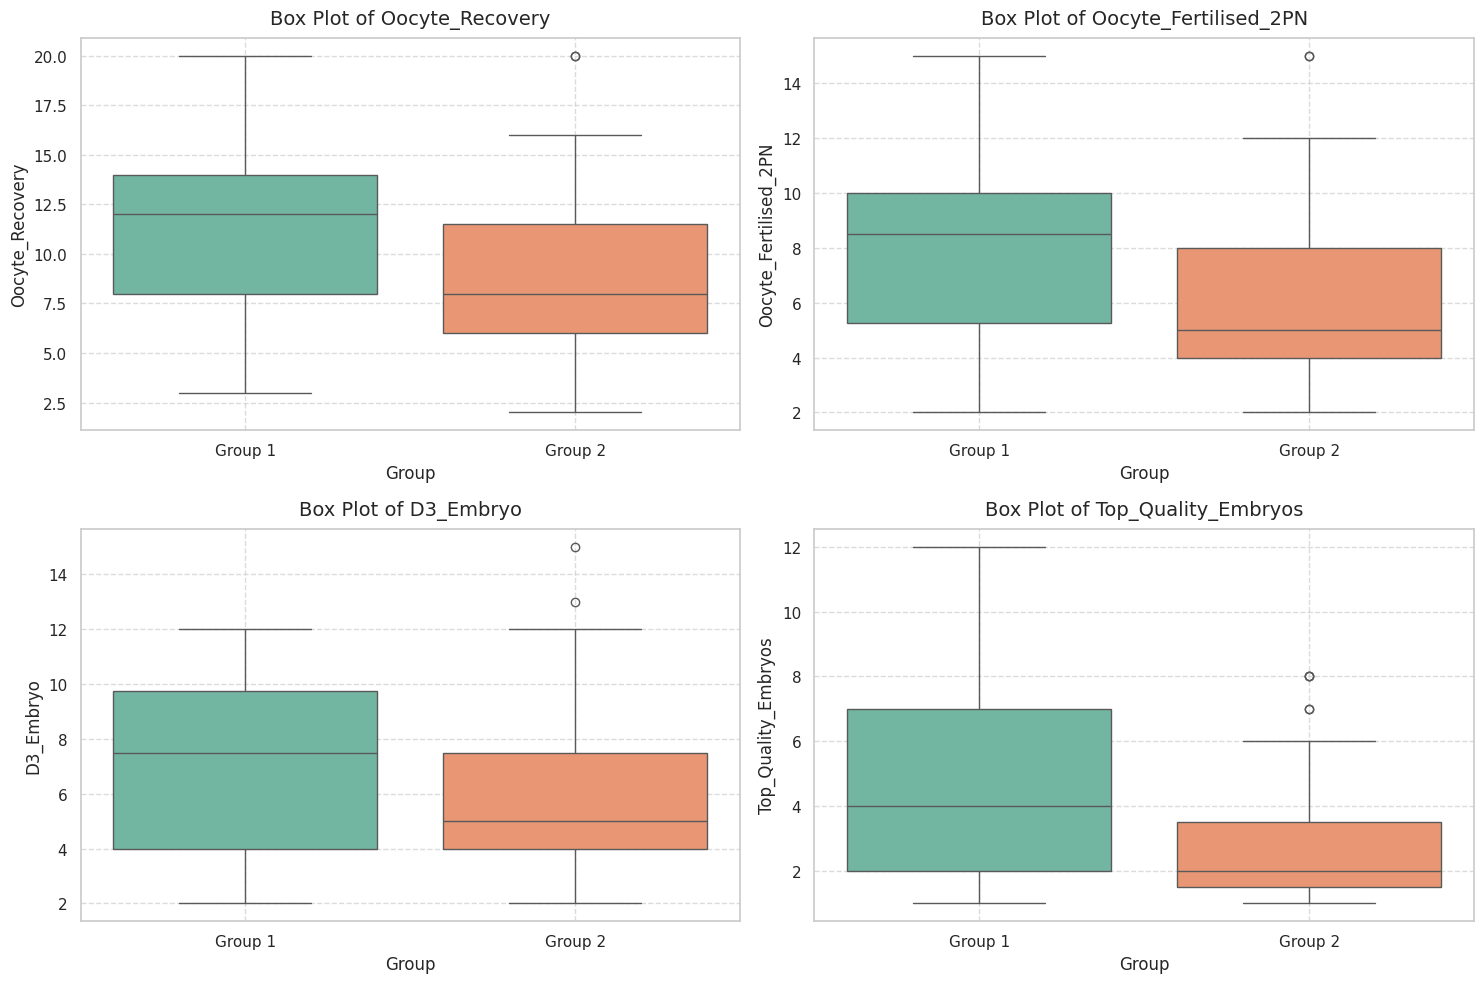

/tmp/ipython-input-69-1101172160.py:124: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group1_data[:,i-1], label='Group 1', shade=True)
/tmp/ipython-input-69-1101172160.py:125: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group2_data[:,i-1], label='Group 2', shade=True)
/tmp/ipython-input-69-1101172160.py:124: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group1_data[:,i-1], label='Group 1', shade=True)
/tmp/ipython-input-69-1101172160.py:125: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group2_da

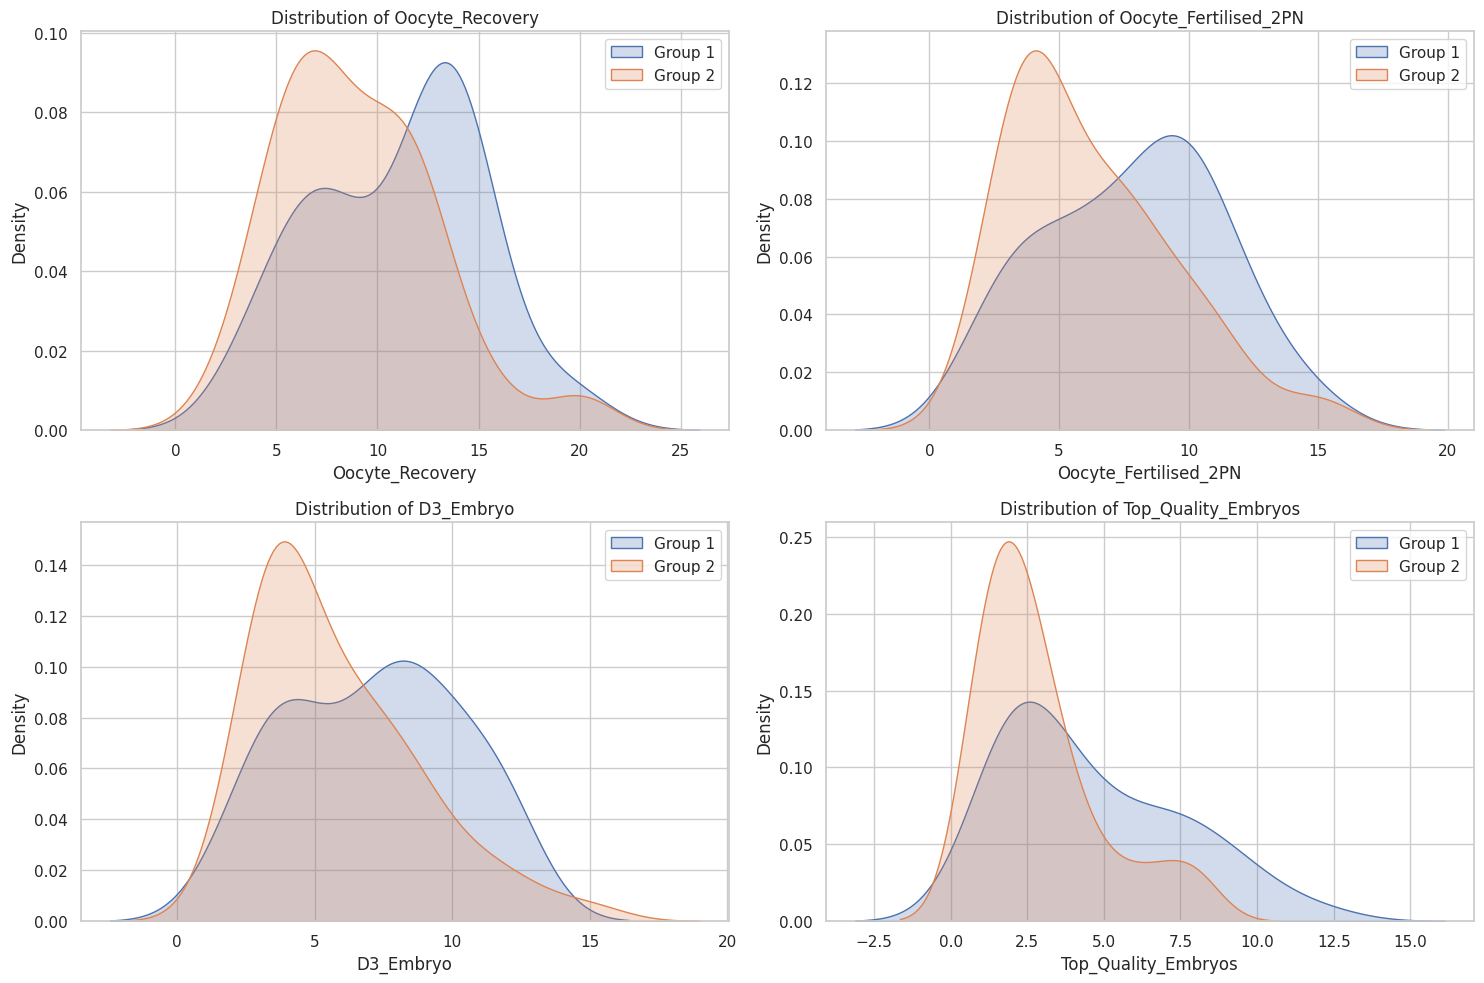


=== Summary Statistics ===


Oocyte_Recovery                                                  Oocyte_Fertilised_2PN                                                 D3_Embryo                                                Top_Quality_Embryos                                              
                  count       mean       std  min  25%   50%   75%   max                 count      mean       std  min   25%  50%   75%   max     count      mean       std  min  25%  50%   75%   max               count      mean       std  min  25%  50%  75%   max
Group                                                                                                                                                                                                                                                                    
Group 1            42.0  11.023810  4.175936  3.0  8.0  12.0  14.0  20.0                  42.0  7.857143  3.425667  2.0  5.25  8.5  10.0  15.0      42.0  7.166667  3.122824  2.0  4.0  7.5  9.75  12.0                42.0  4.595238  2.897093  1.0  2.0  4.0  7.0  12.0
Group 2            55.0   8.945455  3.884529  2.0  6.0   8.0  11.5  20.0                  55.0  6.272727  3.199853  2.0  4.00  5.0   8.0  15.0      55.0  5.818182  2.963300  2.0  4.0  5.0  7.50  15.0                55.0  2.872727  1.972539  1.0  1.5  2.0  3.5   8.0

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
group1_data = np.array([
    [6, 4, 4, 2], [7, 4, 4, 2], [13, 11, 11, 7], [14, 9, 8, 4], [13, 10, 10, 8],
    [8, 7, 7, 3], [4, 3, 3, 1], [14, 10, 10, 10], [9, 6, 6, 6], [8, 6, 4, 2],
    [8, 6, 4, 2], [8, 7, 7, 2], [5, 3, 3, 1], [12, 8, 8, 7], [15, 11, 8, 7],
    [14, 12, 12, 9], [19, 12, 12, 10], [7, 5, 5, 4], [14, 7, 7, 4], [15, 11, 9, 8],
    [17, 14, 12, 12], [8, 6, 6, 5], [20, 15, 12, 5], [13, 9, 8, 6], [12, 9, 9, 8],
    [12, 9, 8, 3], [10, 8, 7, 5], [15, 10, 4, 2], [12, 9, 9, 2], [6, 4, 4, 3],
    [14, 10, 10, 3], [15, 13, 11, 7], [14, 10, 10, 2], [14, 12, 12, 9], [6, 4, 4, 2],
    [14, 10, 8, 3], [11, 7, 6, 4], [12, 9, 9, 5], [4, 2, 2, 2], [12, 2, 2, 2],
    [6, 4, 4, 3], [3, 2, 2, 1]
])

group2_data = np.array([
    [12, 12, 12, 6], [13, 11, 11, 8], [8, 4, 4, 2], [7, 5, 5, 3], [11, 7, 7, 2],
    [12, 8, 8, 4], [11, 7, 7, 3], [12, 9, 9, 3], [20, 15, 13, 7], [11, 9, 9, 5],
    [7, 4, 4, 1], [10, 5, 5, 2], [4, 3, 3, 1], [20, 15, 15, 8], [13, 8, 8, 4],
    [9, 6, 6, 4], [10, 7, 7, 4], [5, 4, 4, 2], [7, 4, 4, 2], [7, 5, 5, 3],
    [8, 5, 4, 2], [15, 11, 11, 8], [4, 3, 3, 1], [14, 10, 10, 6], [6, 5, 4, 2],
    [4, 3, 3, 2], [11, 8, 8, 4], [9, 7, 6, 2], [6, 4, 4, 2], [11, 7, 6, 1],
    [6, 3, 3, 1], [5, 3, 3, 1], [7, 5, 4, 2], [7, 3, 3, 3], [5, 3, 3, 1],
    [6, 4, 4, 2], [10, 8, 6, 2], [16, 12, 7, 3], [6, 4, 4, 1], [7, 4, 3, 2],
    [7, 5, 3, 3], [9, 7, 7, 3], [12, 10, 5, 2], [10, 8, 8, 5], [9, 7, 6, 1],
    [13, 10, 9, 3], [8, 3, 3, 2], [12, 10, 9, 7], [2, 2, 2, 1], [5, 4, 4, 1],
    [8, 6, 6, 3], [12, 4, 4, 1], [5, 4, 4, 2], [3, 2, 2, 1], [5, 3, 3, 1]
])

columns = [
    "Oocyte_Recovery",
    "Oocyte_Fertilised_2PN",
    "D3_Embryo",
    "Top_Quality_Embryos"
]

# Create DataFrames
df_group1 = pd.DataFrame(group1_data, columns=columns)
df_group1['Group'] = 'Group 1'
df_group2 = pd.DataFrame(group2_data, columns=columns)
df_group2['Group'] = 'Group 2'

# Combine data
df = pd.concat([df_group1, df_group2], ignore_index=True)

# Display basic info
print("=== Data Overview ===")
print(f"Total rows: {len(df)}")
print("\nGroup distribution:")
print(df['Group'].value_counts())
print("\nData preview:")
display(df.head())

# Calculate and display totals
print("\n=== Variable Totals ===")
for col in columns:
    group1_total = df_group1[col].sum()
    group2_total = df_group2[col].sum()

    print(f"\nVariable: {col}")
    print(f"Group 1 total: {group1_total}")
    print(f"Group 2 total: {group2_total}")
    print(f"Combined total: {group1_total + group2_total}")

# Normality testing
print("\n=== Normality Tests ===")
normality_results = []

for group in ['Group 1', 'Group 2']:
    df_group = df[df['Group'] == group]
    for col in columns:
        data = df_group[col].dropna()
        # Shapiro-Wilk test
        shapiro_stat, shapiro_p = stats.shapiro(data)
        # Kolmogorov-Smirnov test
        ks_stat, ks_p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
        normality_results.append({
            'Group': group,
            'Variable': col,
            'Shapiro_Stat': shapiro_stat,
            'Shapiro_p': shapiro_p,
            'Shapiro_Normal': shapiro_p >= 0.05,
            'KS_Stat': ks_stat,
            'KS_p': ks_p,
            'KS_Normal': ks_p >= 0.05
        })

# Display normality results
norm_df = pd.DataFrame(normality_results)
display(norm_df)

# Create box plots
print("\n=== Box Plots ===")
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(columns):
    sns.boxplot(x='Group', y=col, data=df, ax=axes[idx], palette="Set2")
    axes[idx].set_title(f'Box Plot of {col}', fontsize=14, pad=10)
    axes[idx].set_xlabel('Group', fontsize=12)
    axes[idx].set_ylabel(col, fontsize=12)
    axes[idx].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Variable names
variables = [
    "Oocyte_Recovery",
    "Oocyte_Fertilised_2PN",
    "D3_Embryo",
    "Top_Quality_Embryos"
]
# Density plots
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(group1_data[:,i-1], label='Group 1', shade=True)
    sns.kdeplot(group2_data[:,i-1], label='Group 2', shade=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.legend()
plt.tight_layout()
plt.show()
# Display summary statistics
print("\n=== Summary Statistics ===")
summary = df.groupby('Group')[columns].describe()
display(summary)

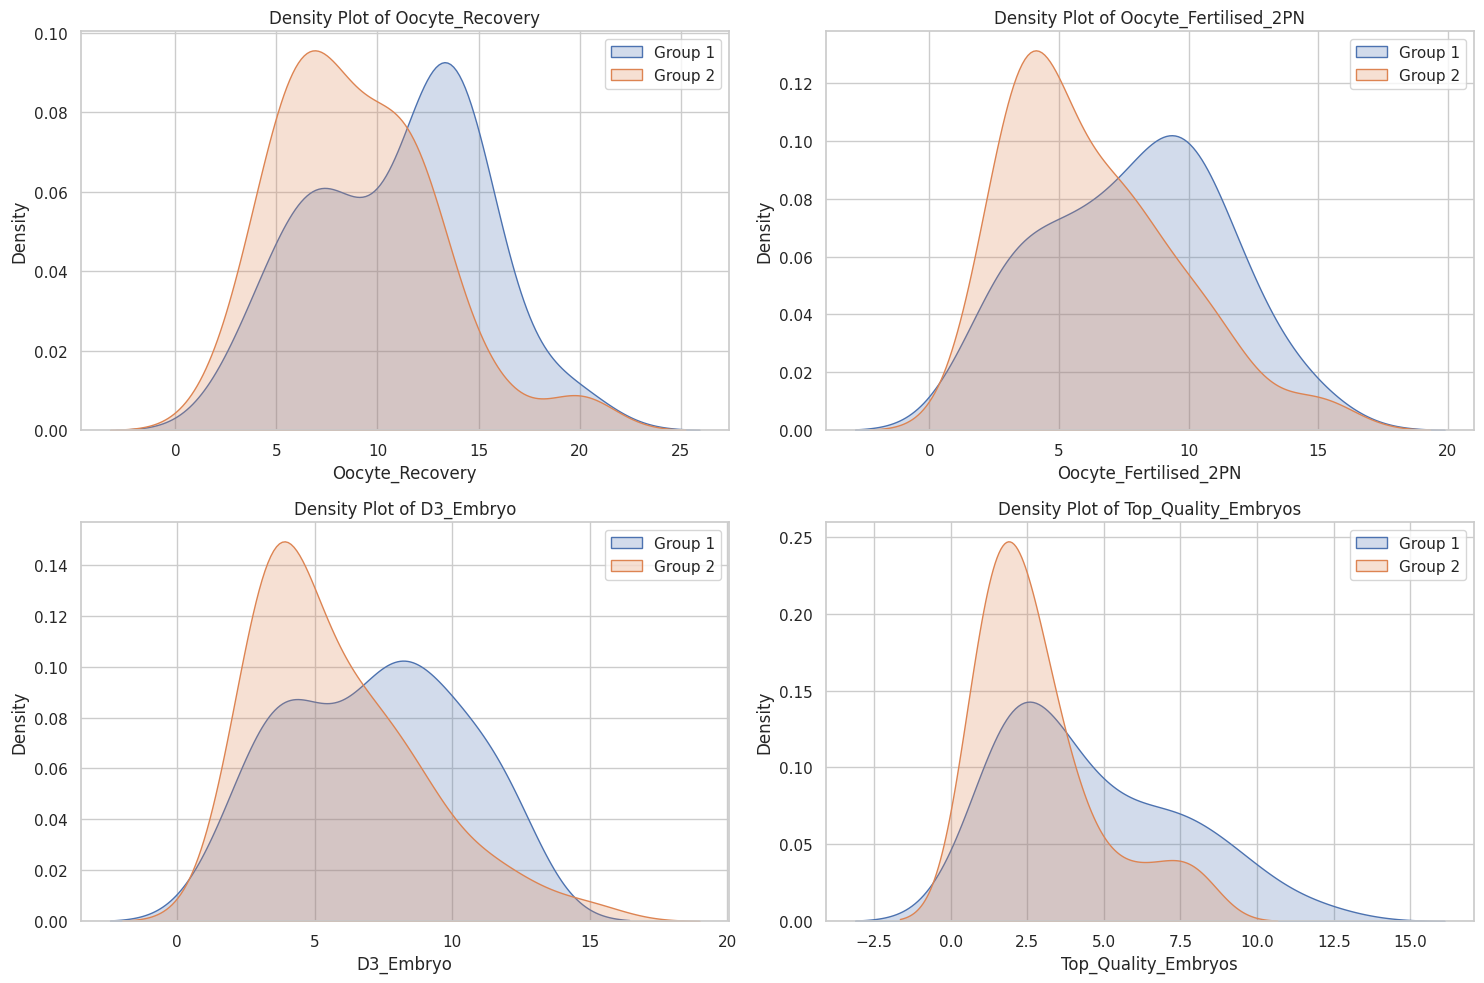

In [ ]:
# prompt: give me a goog looking density plot on every variable

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(group1_data[:,i-1], label='Group 1', fill=True) # Use fill instead of shade
    sns.kdeplot(group2_data[:,i-1], label='Group 2', fill=True)
    plt.title(f'Density Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout()
plt.show()

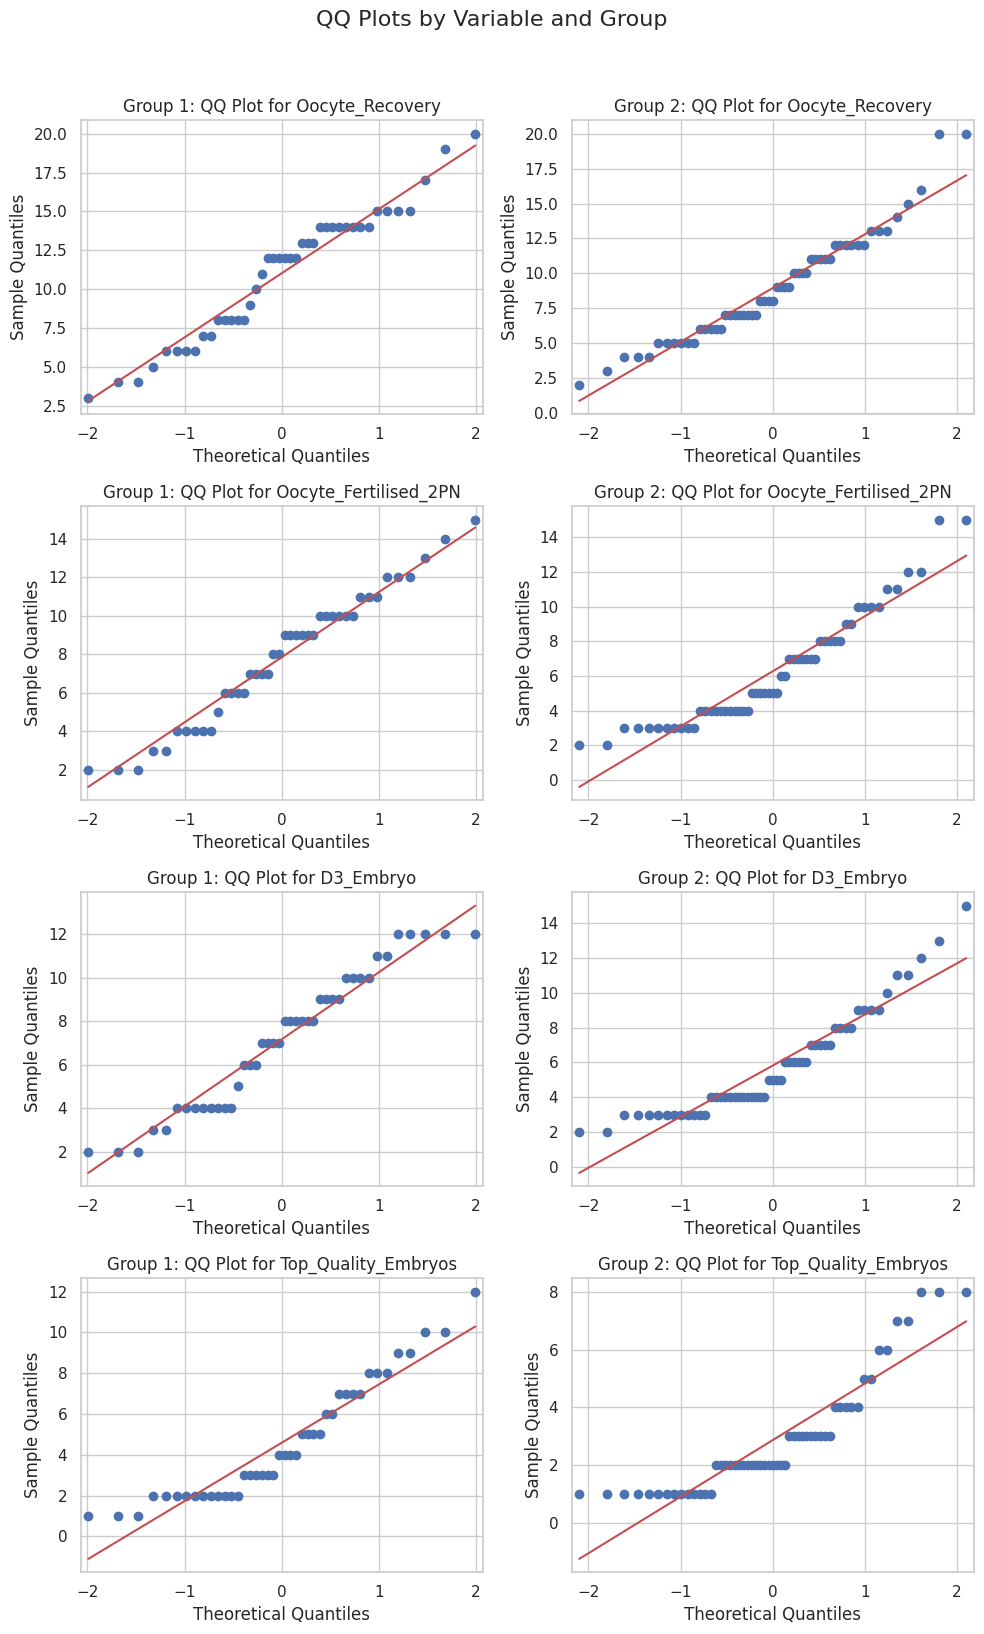

In [ ]:
# prompt: give me QQ plot for complete data

import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming you want QQ plots for each variable in both groups
fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(10, 4 * len(columns)))
fig.suptitle('QQ Plots by Variable and Group', y=1.02, fontsize=16)

for i, col in enumerate(columns):
    # QQ plot for Group 1
    sm.qqplot(df_group1[col].dropna(), line='s', ax=axes[i, 0])
    axes[i, 0].set_title(f'Group 1: QQ Plot for {col}')

    # QQ plot for Group 2
    sm.qqplot(df_group2[col].dropna(), line='s', ax=axes[i, 1])
    axes[i, 1].set_title(f'Group 2: QQ Plot for {col}')

plt.tight_layout()
plt.show()

In [ ]:
# # prompt: can we use one qq plot for complete data

# It looks like the QQ plots were already generated in the preceding code for each variable and each group separately.

# Regarding the question "can we use one qq plot for complete data", the answer is generally no, if "complete data" means combining data from different groups or different variables and making one QQ plot.

# A QQ plot (Quantile-Quantile plot) is used to compare the distribution of a dataset to a theoretical distribution (like the normal distribution).

# 1.  **Combining Groups:** If you combine data from two different groups (like your 'Group 1' and 'Group 2') into a single dataset and create one QQ plot, you are essentially plotting the combined distribution against a theoretical distribution. This plot will tell you how the *combined* data deviates from the theoretical distribution, but it won't tell you about the distribution of each group individually, nor is it appropriate if the two groups have different means or variances (which they likely do, and which you've already tested). A QQ plot is typically used to assess the normality *of a single sample*.

# 2.  **Combining Variables:** Combining data from different variables (like "Oocyte Recovery" and "BMI") into one dataset for a single QQ plot is also not statistically meaningful. These variables measure different things, have different scales, means, and variances. Plotting them together against a single theoretical distribution doesn't provide useful information about the distribution of any individual variable.

# Therefore, the correct approach, as demonstrated in your preceding code, is to create separate QQ plots for each variable *within each group* if you want to assess the normality of that specific variable's distribution within that specific group. This is the standard way to use QQ plots for comparing distributions across different samples or groups.

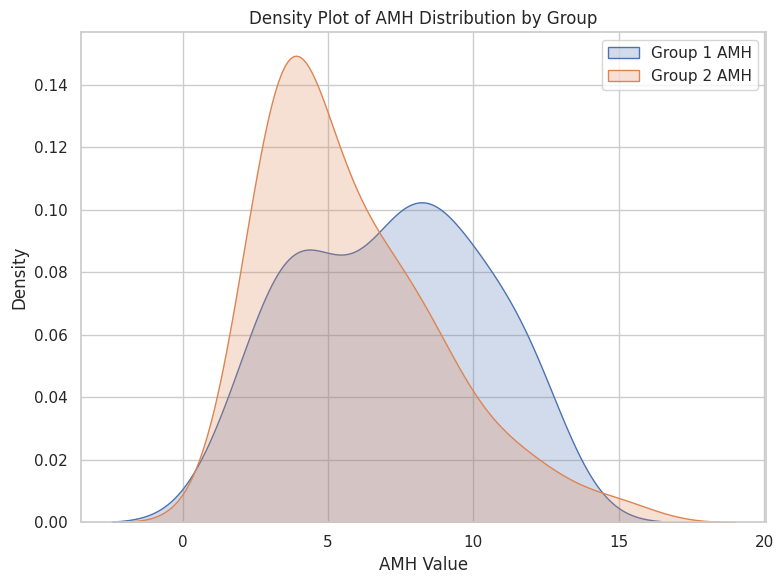

In [ ]:
# prompt: Density plot of AMH of 2 group

import matplotlib.pyplot as plt
# Density plots for AMH
plt.figure(figsize=(8, 6))
sns.kdeplot(group1_data[:, 2], label='Group 1 AMH', fill=True) # Index 2 is AMH
sns.kdeplot(group2_data[:, 2], label='Group 2 AMH', fill=True)
plt.title('Density Plot of AMH Distribution by Group')
plt.xlabel('AMH Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()